In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('census-income.csv')

In [4]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country annual_income  
0          2174             0              40  United-States         <=50K  
1             0             0              13  United-States         <=50K  
2             0             0              40  United-States         <=50K  
3             0             0              40  United-States         <=50K  
4             0             0              40           Cuba         <=50K

In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

### Data wrangling

In [8]:
for i in df.columns:
    
    if df[i].dtype == 'object':
        print(i)
        print(df[i].unique(), '\n')

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex
['Male' 'Female'] 

native-country
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'Engl

In [9]:
df.workclass = df.workclass.replace('?', None)
df.occupation = df.occupation.replace('?', None)
df['native-country'] = df['native-country'].replace('?', None)

In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [11]:
null_col = ('workclass', 'occupation', 'native-country')

In [12]:
for i in null_col:
    
    df[i] = df[i].fillna(method = 'bfill')

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [14]:
df.shape

(32561, 15)

In [15]:
for i in df.columns:
    
    if df[i].dtype == 'object':
        df[i] = df[i].str.replace('-', '_')

In [16]:
def box_plot(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype != 'object':
            sns.boxplot(dataframe[i], orient = 'h').set_title(f'{i}', fontweight  = 'bold')
            plt.show()

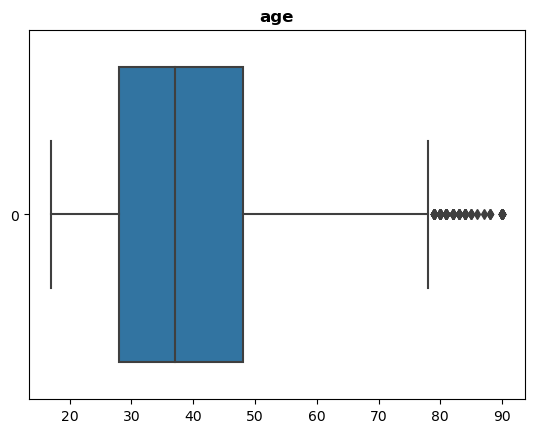

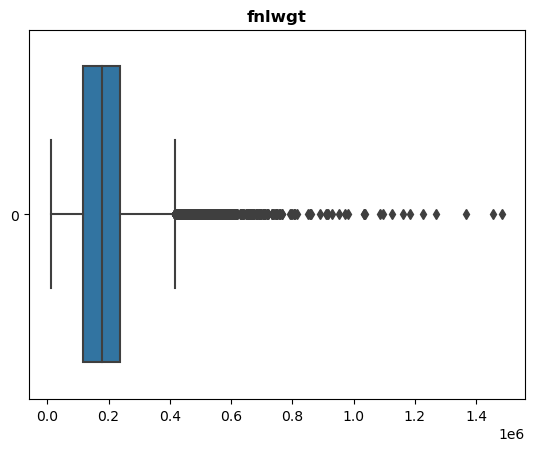

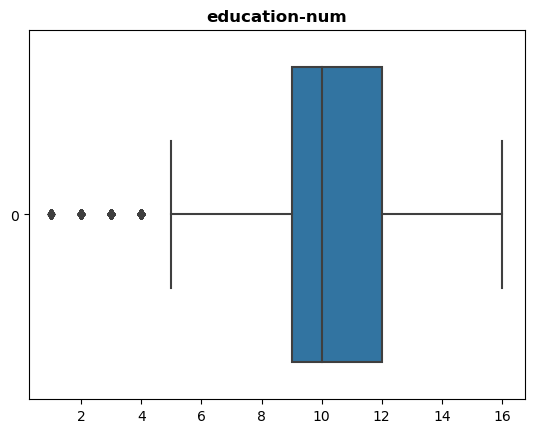

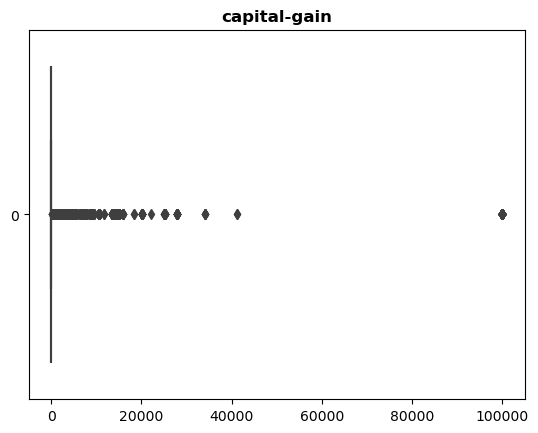

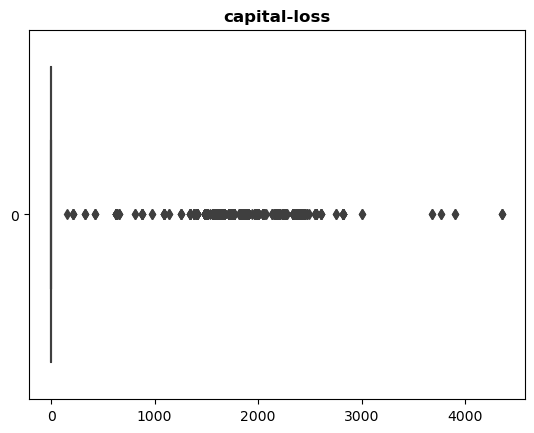

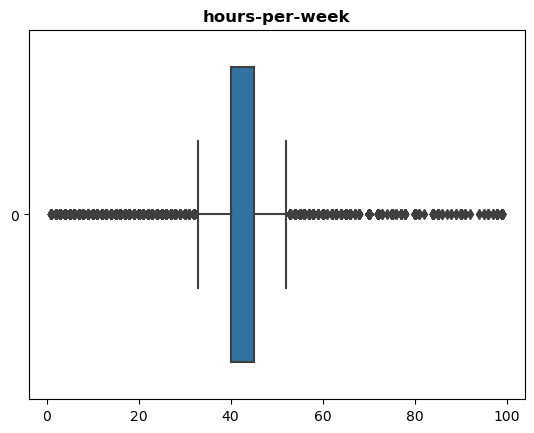

In [17]:
box_plot(df)

In [18]:
column = [i for i in df.columns if df[i].dtype != 'object']

In [19]:
column

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [20]:
column[3:] = []

In [21]:
column

['age', 'fnlwgt', 'education-num']

In [22]:
# q1 = df['fnlwgt'].quantile(0.25)
# q3 = df['fnlwgt'].quantile(0.75)

# iqr = q3 - q1

# lower_fence = q1 - 1.5 * iqr
# upper_fence = q3 + 1.5 * iqr

# df['fnlwgt'] = df['fnlwgt'][(df['fnlwgt'] >= lower_fence) & (df['fnlwgt'] <= upper_fence)]

In [23]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqr = q3 - q1

lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

df = df[(df['age'] >= lower_fence) & (df['age'] <= upper_fence)]

In [24]:
# q1 = df['education-num'].quantile(0.25)
# q3 = df['education-num'].quantile(0.75)

# iqr = q3 - q1

# lower_fence = q1 - 1.5 * iqr
# upper_fence = q3 + 1.5 * iqr

# df['education-num'] = df['education-num'][(df['education-num'] >= lower_fence) & (df['education-num'] <= upper_fence)]

In [25]:
# q1 = df['capital-gain'].quantile(0.25)
# q3 = df['capital-gain'].quantile(0.75)

# iqr = q3 - q1

# lower_fence = q1 - 1.5 * iqr
# upper_fence = q3 + 1.5 * iqr

# df['capital-gain'] = df['capital-gain'][(df['capital-gain'] >= lower_fence) & (df['capital-gain'] <= upper_fence)]

In [26]:
# q1 = df['capital-loss'].quantile(0.25)
# q3 = df['capital-loss'].quantile(0.75)

# iqr = q3 - q1

# lower_fence = q1 - 1.5 * iqr
# upper_fence = q3 + 1.5 * iqr

# df['capital-loss'] = df['capital-loss'][(df['capital-loss'] >= lower_fence) & (df['capital-loss'] <= upper_fence)]

In [27]:
# q1 = df['hours-per-week'].quantile(0.25)
# q3 = df['hours-per-week'].quantile(0.75)

# iqr = q3 - q1

# lower_fence = q1 - 1.5 * iqr
# upper_fence = q3 + 1.5 * iqr

# df['hours-per-week'] = df['hours-per-week'][(df['hours-per-week'] >= lower_fence) & (df['hours-per-week'] <= upper_fence)]

In [28]:
# for i in column:
    
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
    
#     iqr = q3 - q1
    
#     lower_fence = q1 - 1.5 * iqr
#     upper_fence = q1 + 1.5 * iqr
    
#     df[column] = df[column][(df[column] >= lower_fence) & (df[column] <= upper_fence)]

In [29]:
# box_plot(df)

In [30]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State_gov   77516  Bachelors             13   
1   50  Self_emp_not_inc   83311  Bachelors             13   
2   38           Private  215646    HS_grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never_married       Adm_clerical  Not_in_family  White    Male   
1  Married_civ_spouse    Exec_managerial        Husband  White    Male   
2            Divorced  Handlers_cleaners  Not_in_family  White    Male   
3  Married_civ_spouse  Handlers_cleaners        Husband  Black    Male   
4  Married_civ_spouse     Prof_specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country annual_income  
0          2174             0              40  United_States         <=50K  
1             0             0              13  United_States         <=50K  
2             0             0              40  United_States         <=50K  
3             0             0              40  United_States         <=50K  
4             0             0              40           Cuba         <=50K

In [31]:
df.shape

(32418, 15)

In [32]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

### Data Analysis

In [33]:
columns = df.columns
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [34]:
def str_cols():
    
    for i in df.columns:
        
        if df[i].dtype == 'object':
            print(i)
            print(df[i].unique(), '\n')

In [35]:
str_cols()

workclass
['State_gov' 'Self_emp_not_inc' 'Private' 'Federal_gov' 'Local_gov'
 'Self_emp_inc' 'Without_pay' 'Never_worked'] 

education
['Bachelors' 'HS_grad' '11th' 'Masters' '9th' 'Some_college' 'Assoc_acdm'
 'Assoc_voc' '7th_8th' 'Doctorate' 'Prof_school' '5th_6th' '10th'
 '1st_4th' 'Preschool' '12th'] 

marital-status
['Never_married' 'Married_civ_spouse' 'Divorced' 'Married_spouse_absent'
 'Separated' 'Married_AF_spouse' 'Widowed'] 

occupation
['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' 'Protective_serv'
 'Armed_Forces' 'Priv_house_serv'] 

relationship
['Not_in_family' 'Husband' 'Wife' 'Own_child' 'Unmarried' 'Other_relative'] 

race
['White' 'Black' 'Asian_Pac_Islander' 'Amer_Indian_Eskimo' 'Other'] 

sex
['Male' 'Female'] 

native-country
['United_States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto_Rico'
 'Honduras' 'England' 'Canada

In [36]:
countries = df['native-country'].unique().tolist()

In [37]:
workclasses = df['workclass'].sort_values().unique().tolist()
workclasses

['Federal_gov',
 'Local_gov',
 'Never_worked',
 'Private',
 'Self_emp_inc',
 'Self_emp_not_inc',
 'State_gov',
 'Without_pay']

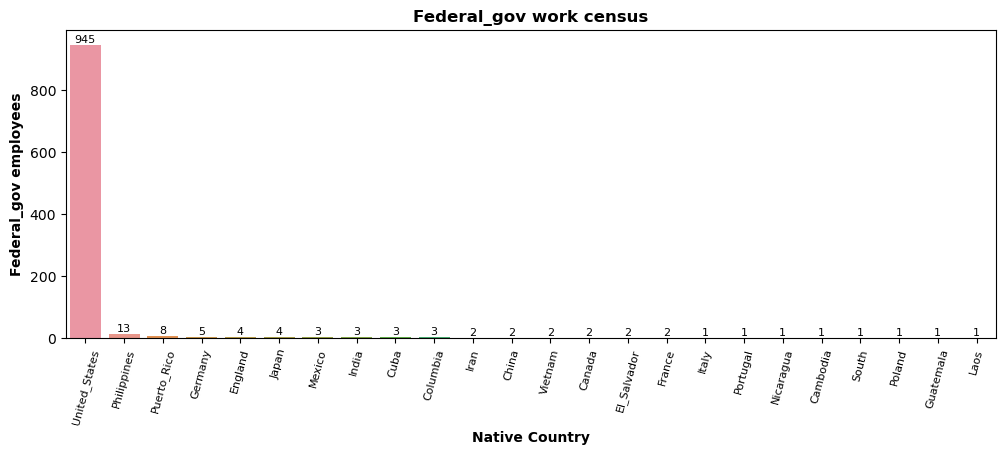

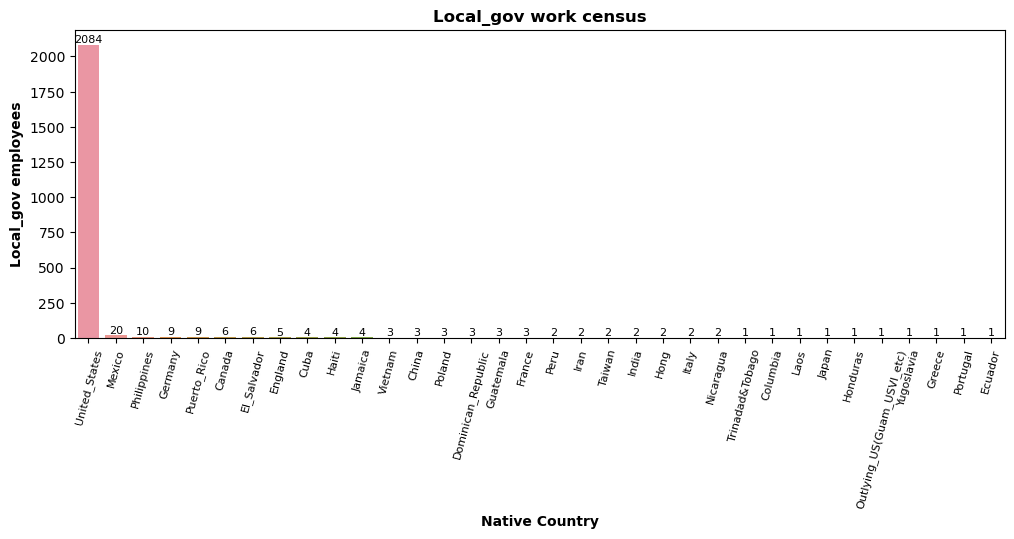

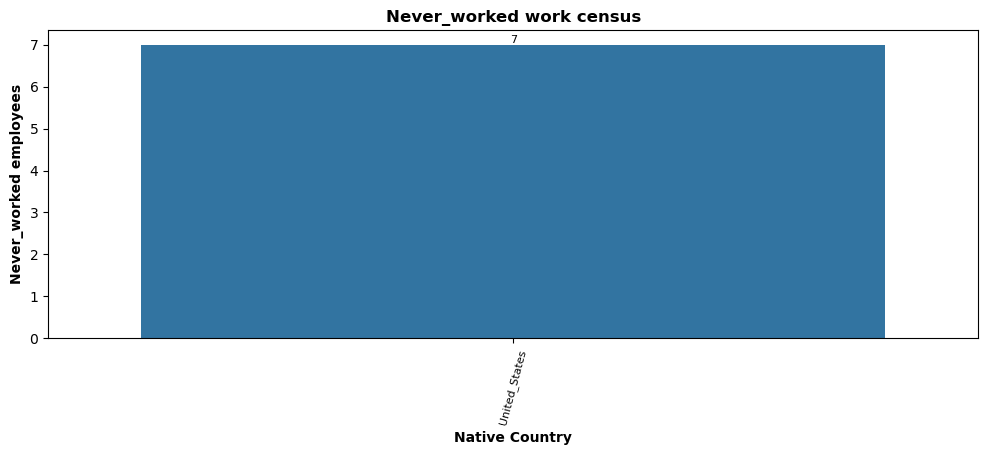

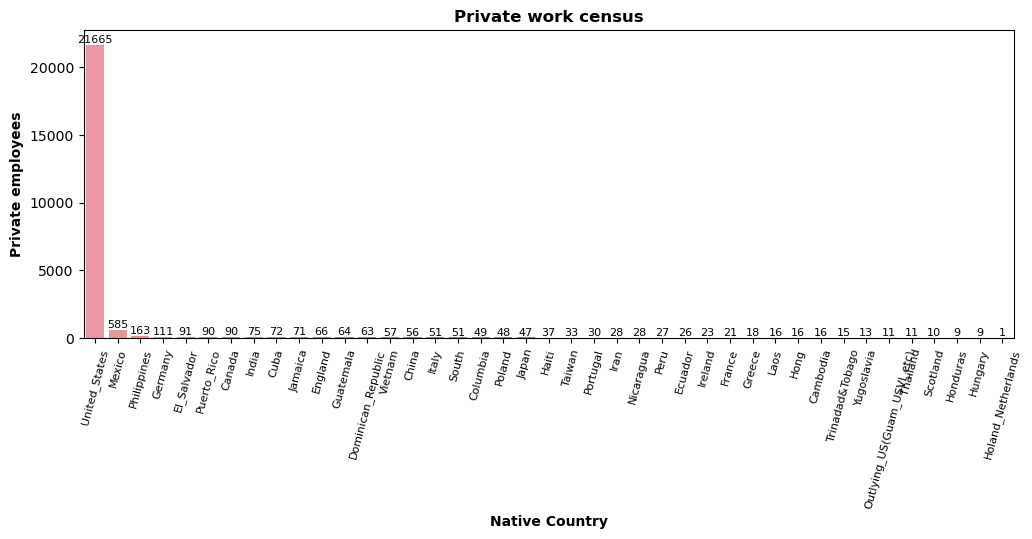

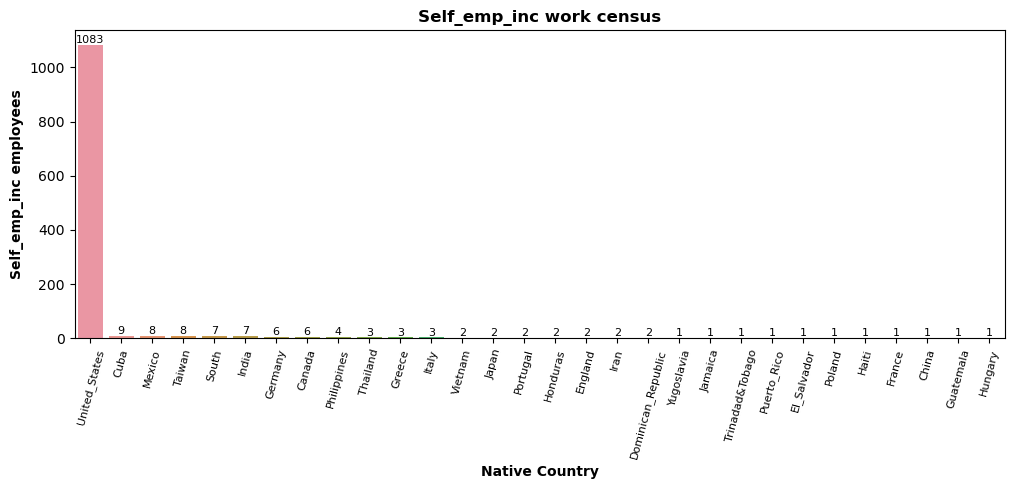

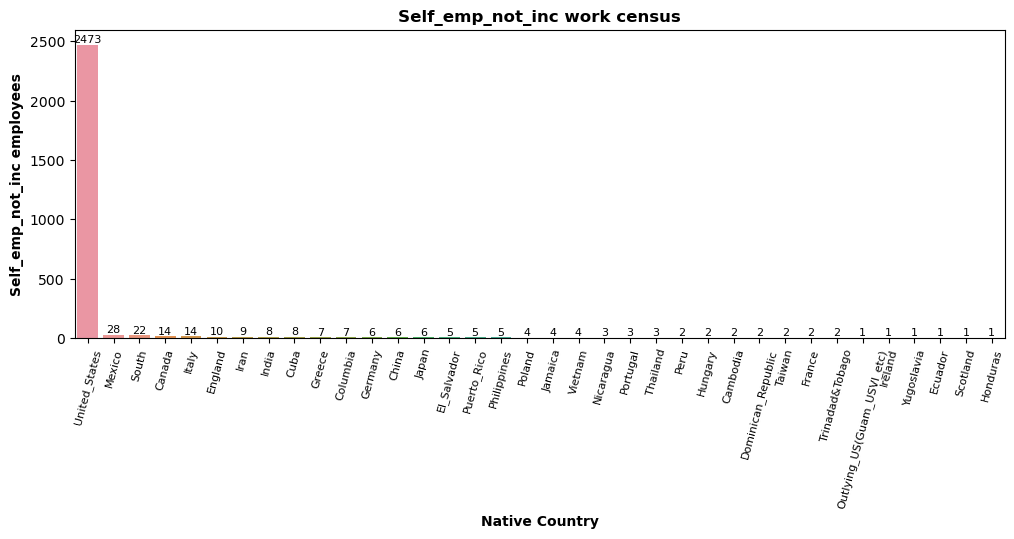

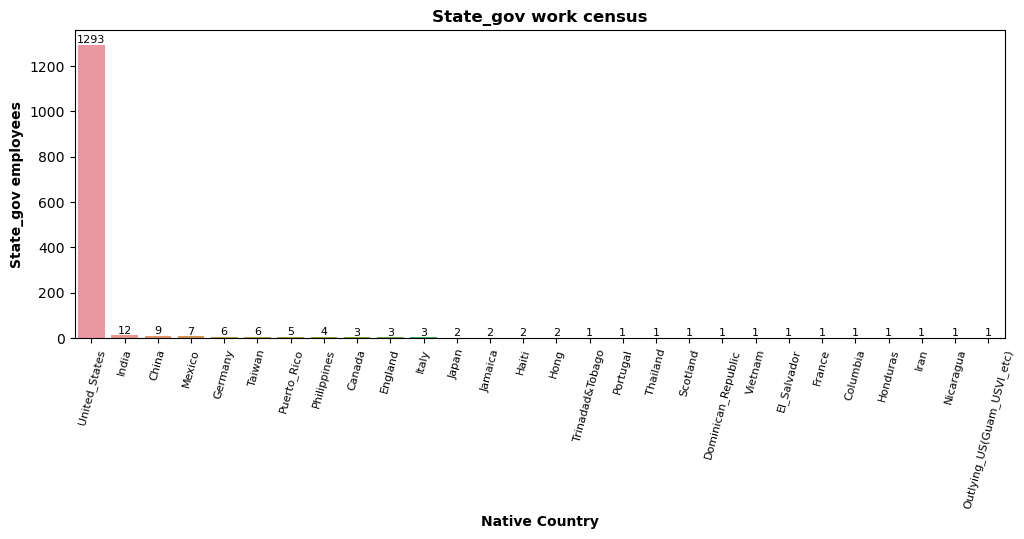

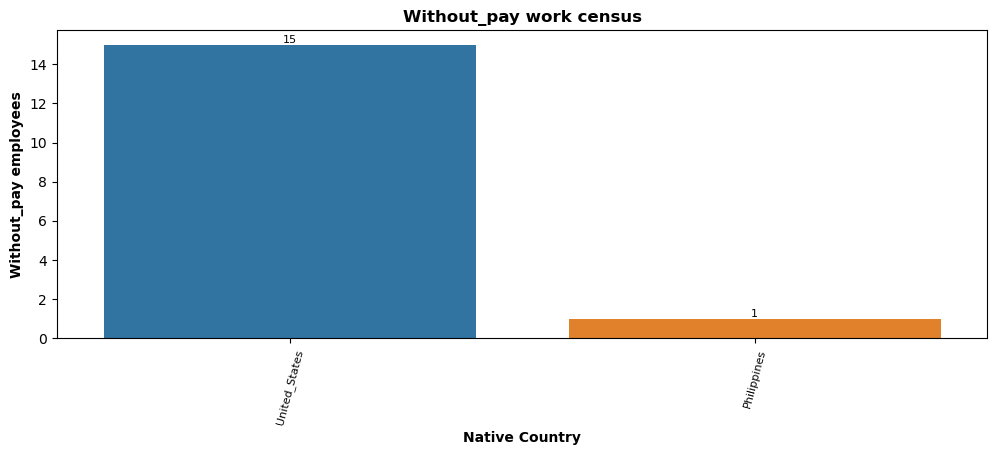

In [38]:
for i in workclasses:
    plt.figure(figsize=(12, 4))
    ax = sns.countplot(x = df['native-country'][df['workclass'] == i],
                 order = df['native-country'][df['workclass'] == i].value_counts().index)
    plt.xlabel('Native Country', fontweight = 'bold')
    plt.xticks(rotation = 75, fontsize = 8)
    plt.ylabel(f'{i} employees', fontweight = 'bold')
    plt.title(f'{i} work census', fontweight  = 'bold')
    ax.bar_label(ax.containers[0], fontsize = 8)
    plt.show()

1. **Federal Employees**:
   - The United States boasts the highest number of federal government employees, followed by the Philippines and Puerto Rico.
   - Conversely, Italy, Portugal, Nicaragua, Cambodia, Poland, Guatemala, and Laos have the fewest federal employees.

2. **Local Government Employees**:
   - In terms of local government employees, the United States leads the way, with Mexico and the Philippines following closely.
   - On the other hand, Trinidad and Tobago, Colombia, Laos, Japan, Honduras, the Outlying US territories, Yugoslavia, Greece, Portugal, and Ecuador have the lowest local government employment.

3. **Private Sector Employees**:
   - The United States dominates the private sector employee count, with Mexico and the Philippines trailing behind.
   - Interestingly, the Netherlands (Holland) has the fewest private employees, followed by Hungary, Honduras, Scotland, and Thailand.

4. **Self-Employed Individuals**:
   - Self-employment statistics reveal that the United States leads the pack, closely followed by Cuba and Mexico.
   - In contrast, countries like Yugoslavia, Jamaica, Trinidad and Tobago, Puerto Rico, El Salvador, Poland, Haiti, France, China, Guatemala, and Hungary have the lowest self-employed numbers.

5. **Self-Employed without Income**:
   - Among those who are self-employed without income, the United States takes the lead, with Mexico, South Korea, and Canada following suit.
   - Meanwhile, Trinidad and Tobago, the Outlying US territories, Ireland, Yugoslavia, Ecuador, Scotland, and Honduras have the fewest self-employed individuals without income.

6. **State Government Employees**:
   - State government employment sees the United States at the forefront, with India, China, and Mexico in pursuit.
   - Conversely, Trinidad and Tobago, Portugal, Thailand, Scotland, the Dominican Republic, Vietnam, El Salvador, France, Colombia, Honduras, Iran, Nicaragua, and the Outlying US territories have the lowest state government employment.

7. **Unpaid Workers**:
   - The United States has the highest number of people working without any payment, while the Philippines reports the lowest count.

8. **Never Worked**:
   - Interestingly, according to the provided dataset, the United States is the only country where some individuals have never worked.

9. **Overall Employment Rate**:
   - Based on the observations, it's evident that the United States consistently ranks highest across various employment categories, indicating a robust employment rate.

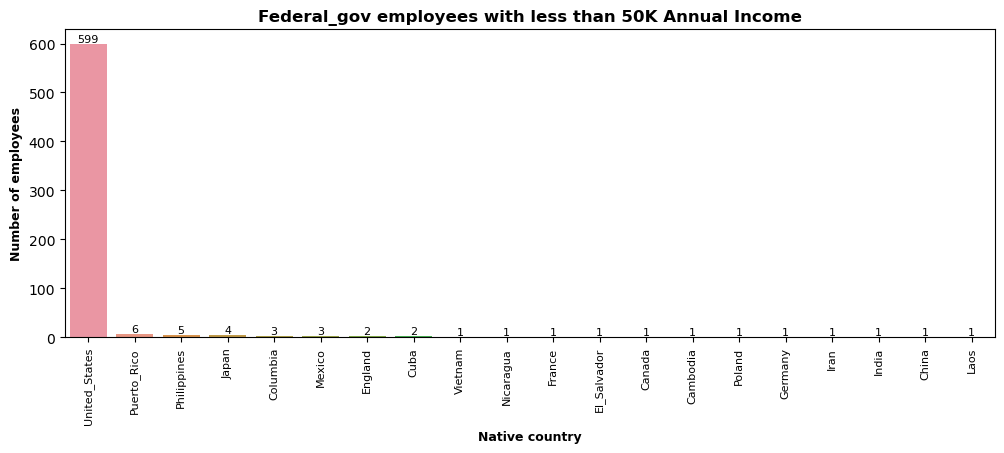

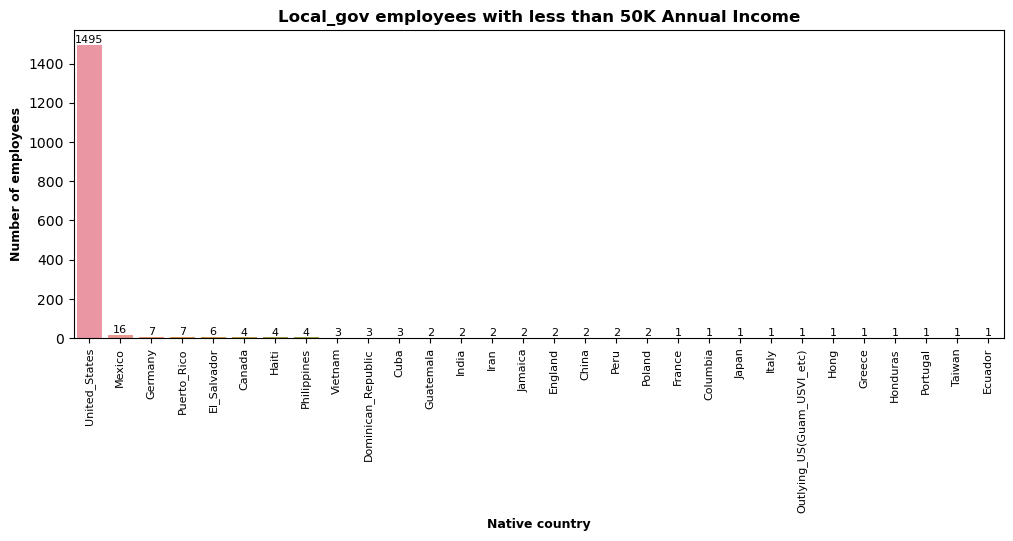

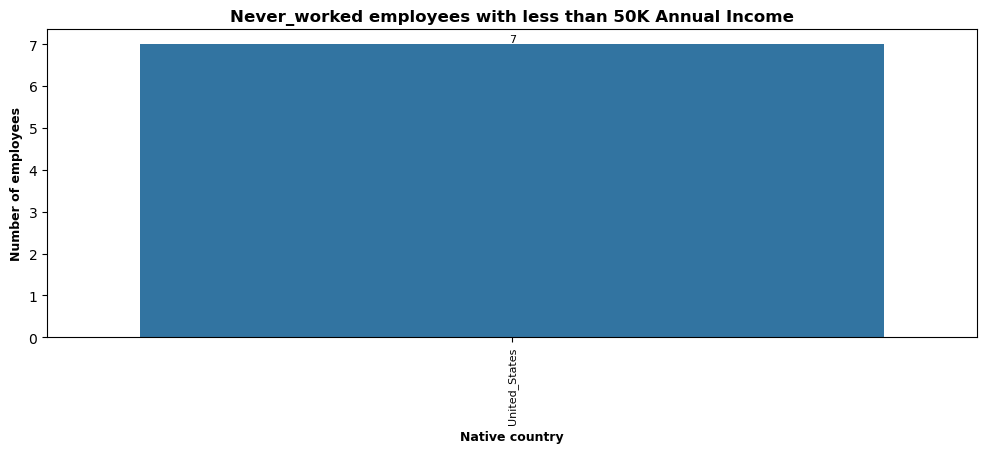

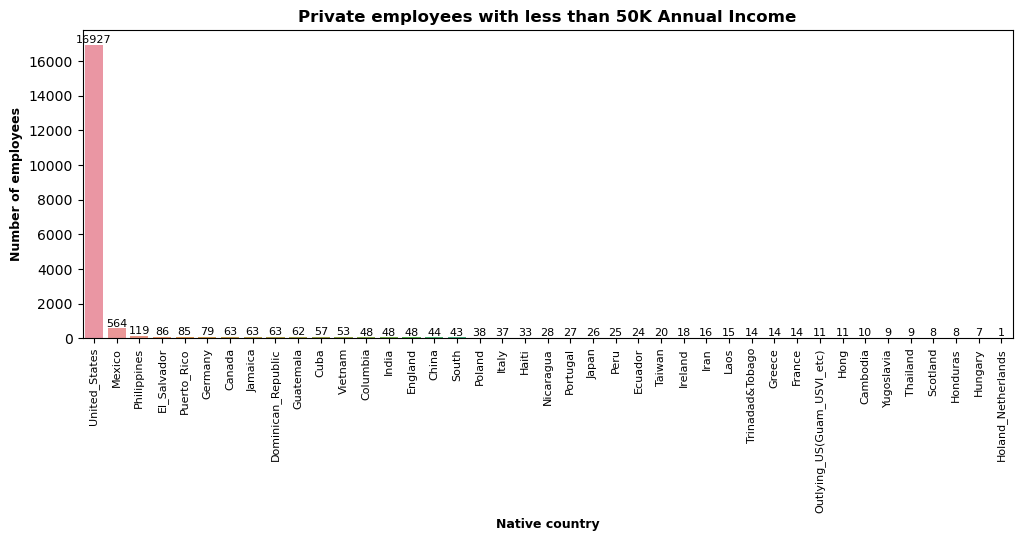

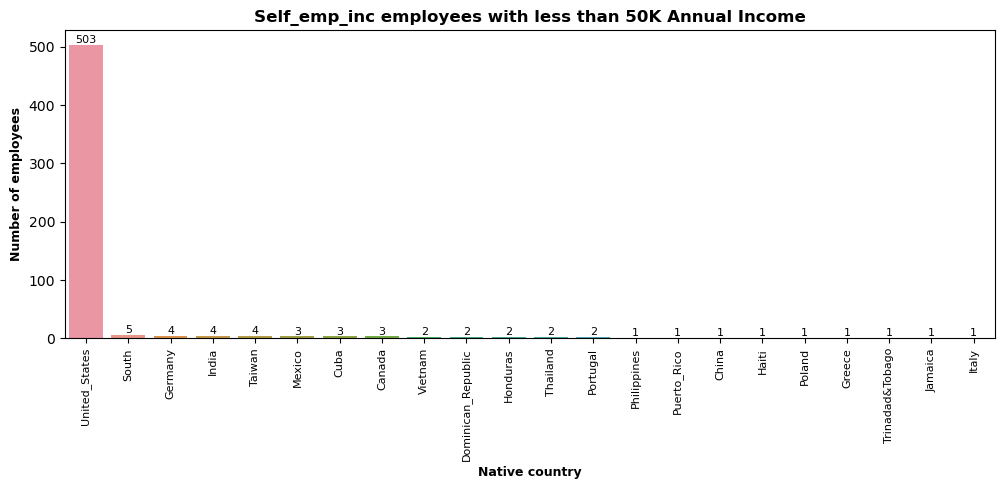

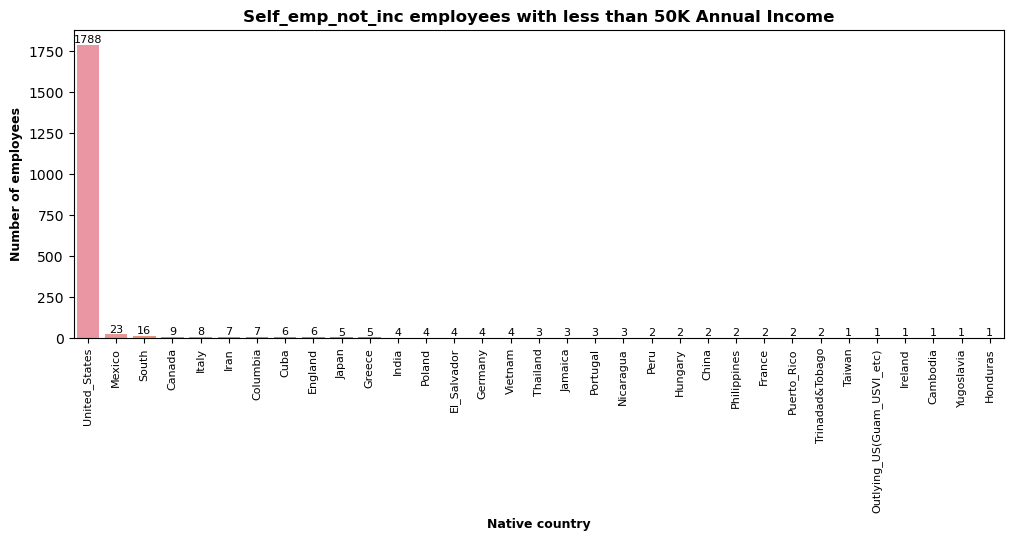

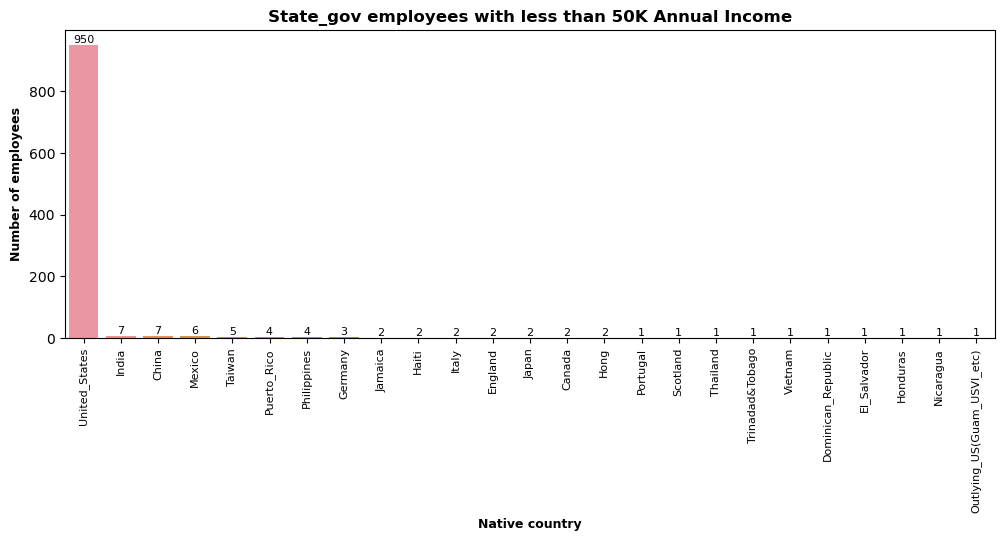

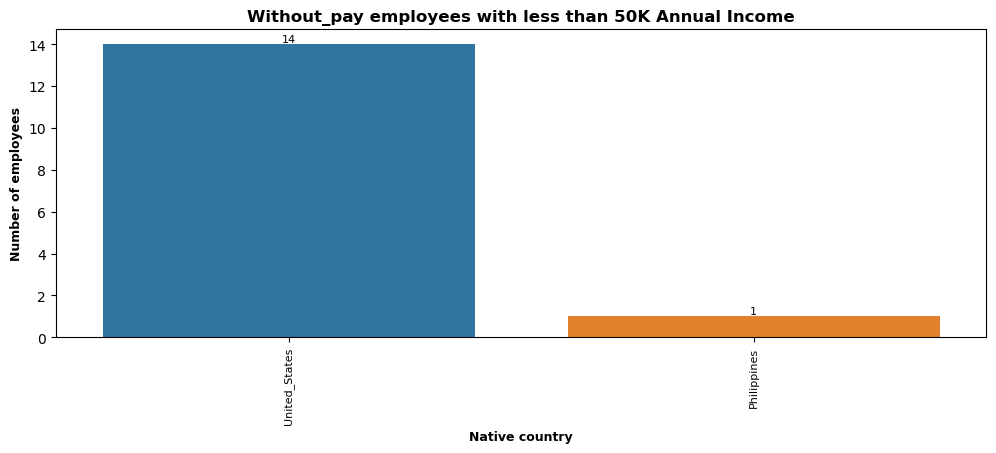

In [39]:
for i in workclasses:
    plt.figure(figsize  = (12, 4))
    ax = sns.countplot(x = df['native-country'][(df['annual_income'] == '<=50K') & (df['workclass'] == i)], 
         order = df['native-country'][(df['annual_income'] == '<=50K') & (df['workclass'] == i)].value_counts().index)
    plt.title(f'{i} employees with less than 50K Annual Income', fontweight = 'bold')
    plt.xlabel('Native country', fontweight = 'bold', fontsize = 9)
    plt.xticks(rotation = 90, fontsize = 8)
    plt.ylabel('Number of employees', fontweight  = 'bold', fontsize = 9)
    ax.bar_label(ax.containers[0], fontsize = 8)
    plt.show()

1. The United States has the highest number of federal government employees earning an annual income of less than **$50,000**, followed by Puerto Rico, the Philippines, and Japan. Conversely, the lowest number of such employees can be found in Vietnam, Nicaragua, France, El Salvador, Canada, Cambodia, Poland, Germany, Iran, India, China, and Laos.

2. Among local government employees, the United States also leads in having the highest number of individuals earning less than **$50,000** annually. Mexico, Germany, Puerto Rico, and El Salvador follow suit. On the other hand, France, Colombia, Japan, Italy, the Outlying US, Hong Kong, Greece, Honduras, Portugal, Taiwan, and Ecuador have the fewest local government employees in this income bracket.

3. In the private sector, the United States again tops the list with the highest number of employees earning less than **$50,000** per year. Mexico, the Philippines, El Salvador, and Puerto Rico come next. Conversely, the Netherlands, Hungary, Honduras, Scotland, and Thailand have the fewest private employees falling into this income category.

4. Self-employed individuals in the United States constitute the largest group earning less than **$50,000** annually. South Korea, Germany, India, Taiwan, and Mexico follow suit. Surprisingly, the Philippines, Puerto Rico, China, Haiti, Poland, Greece, Trinidad and Tobago, Jamaica, and Italy have the fewest self-employed individuals in this income range.

5. The United States also leads in the number of no-income self-employed individuals earning less than **$50,000** annually. Mexico, South Korea, Canada, Italy, and Iran follow. In contrast, Taiwan, the Outlying US, Ireland, Colombia, Yugoslavia, and Honduras have the fewest no-income self-employed workers.

6. Among state government employees, the United States has the highest number of individuals earning less than **$50,000** annually. India, China, Mexico, Taiwan, and Puerto Rico are next in line. Conversely, Portugal, Scotland, Thailand, Trinidad and Tobago, Vietnam, the Dominican Republic, El Salvador, Honduras, Nicaragua, and the Outlying US have the fewest state government employees in this income bracket.

7. Interestingly, the United States has the highest number of employees without any specific employer who earn less than **$50,000** annually. In contrast, the Philippines has the fewest such individuals.

8. Surprisingly, there are individuals in the United States who have never worked and yet earn less than **$50,000** annually.

9. Based on the graphs above, it is evident that **private employees** earning less than **$50,000** are the highest, followed by local government, state government, and federal government employees.

10. Interestingly, there are more self-employed individuals without any income than those earning less than **$50,000** annually.

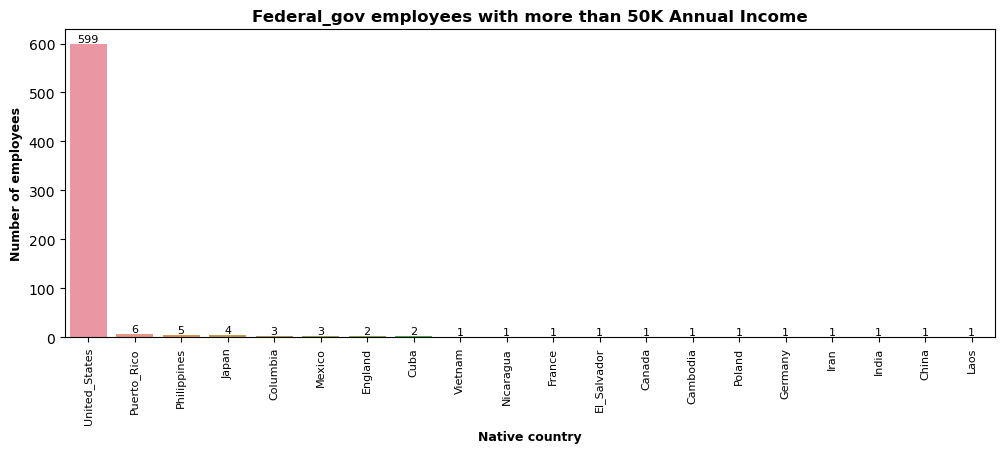

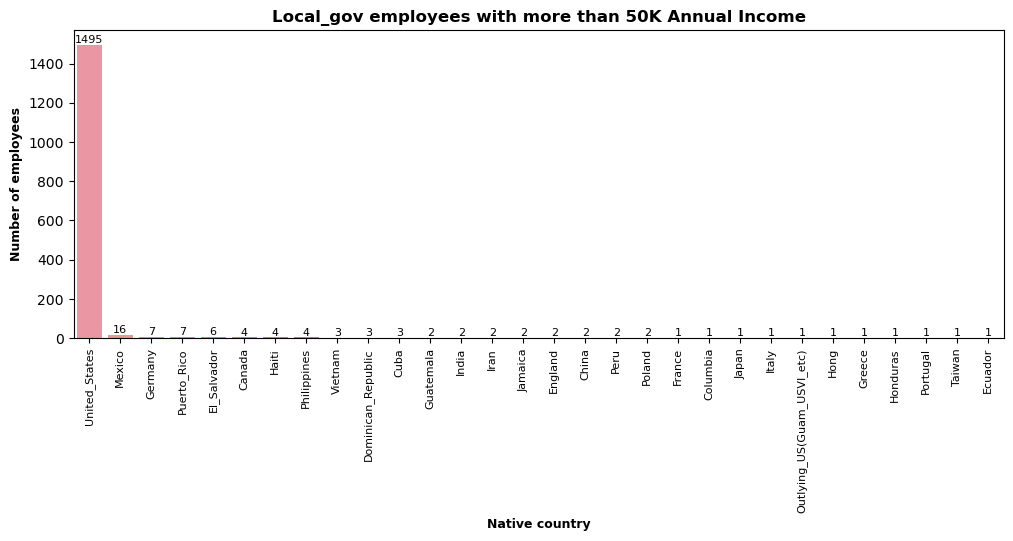

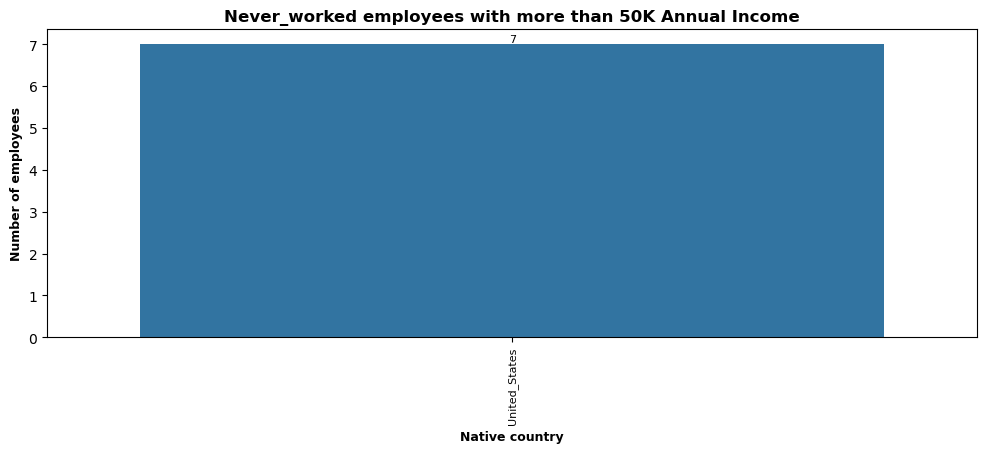

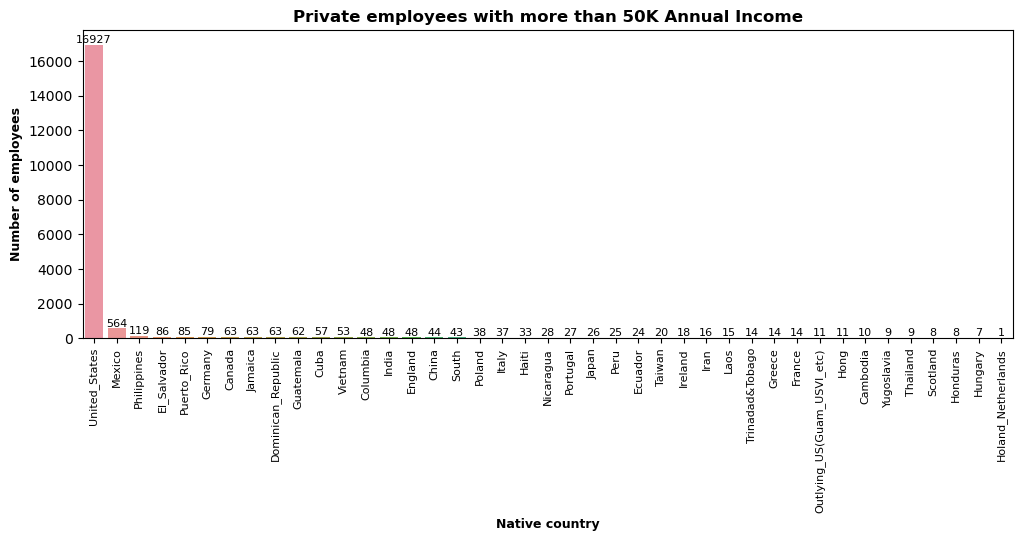

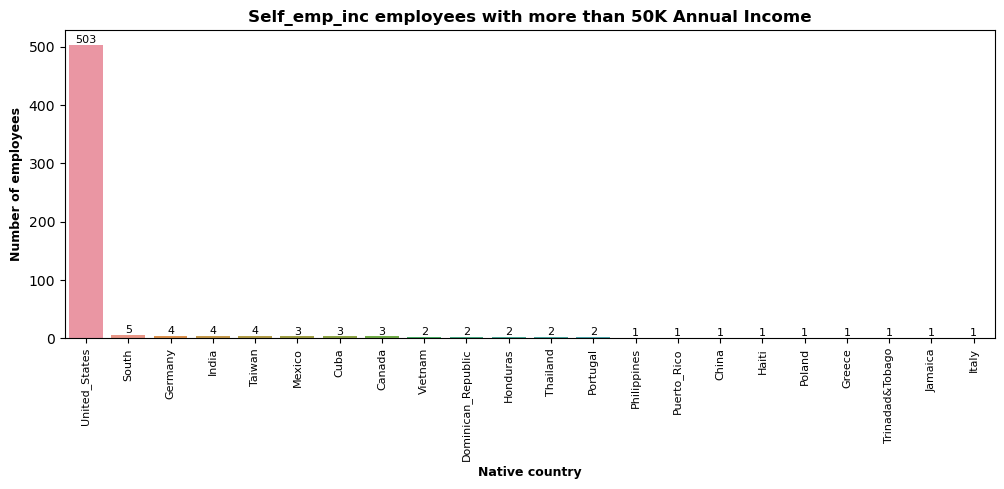

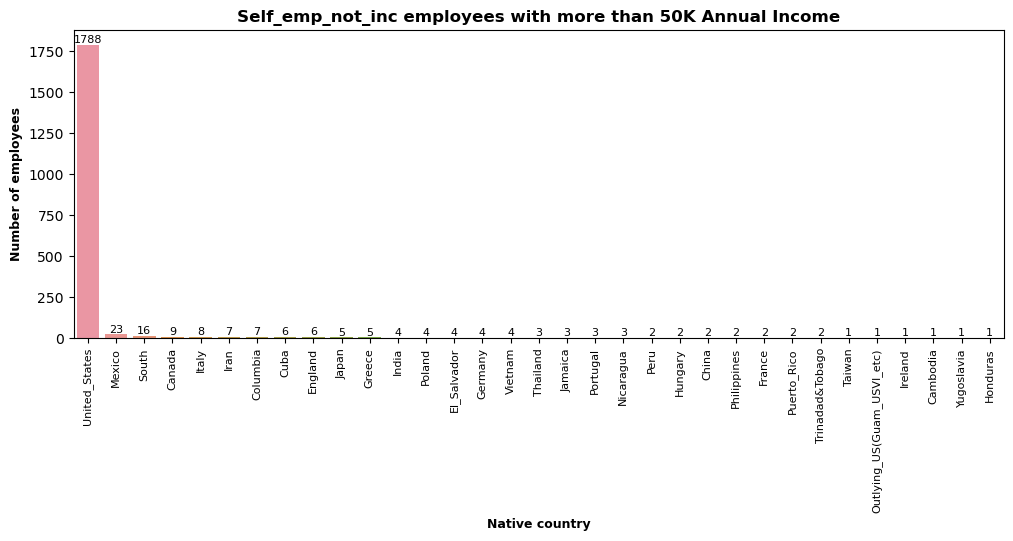

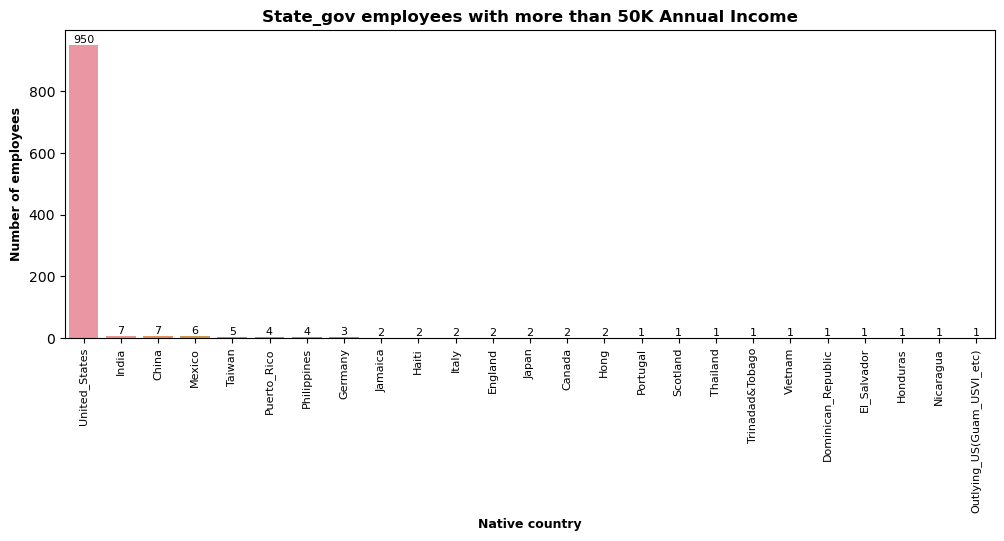

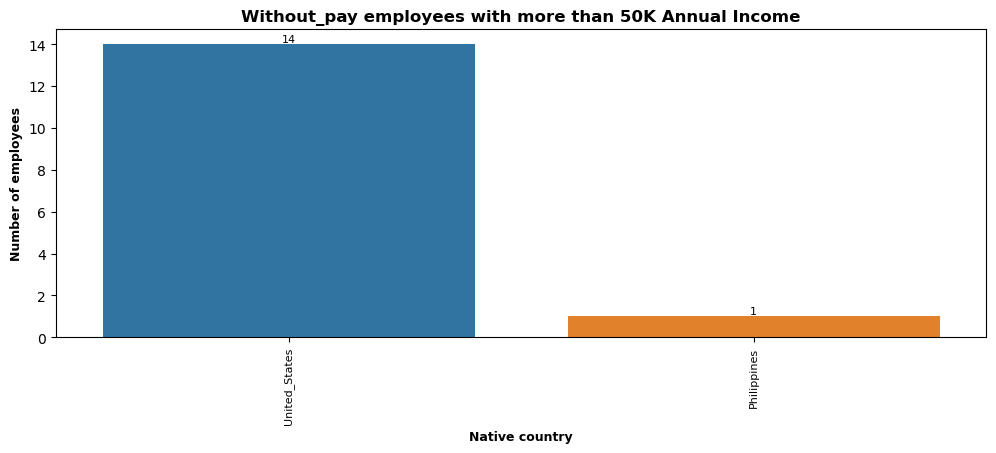

In [40]:
for i in workclasses:
    plt.figure(figsize  = (12, 4))
    ax = sns.countplot(x = df['native-country'][(df['annual_income'] == '<=50K') & (df['workclass'] == i)], 
         order = df['native-country'][(df['annual_income'] == '<=50K') & (df['workclass'] == i)].value_counts().index)
    plt.title(f'{i} employees with more than 50K Annual Income', fontweight = 'bold')
    plt.xlabel('Native country', fontweight = 'bold', fontsize = 9)
    plt.xticks(rotation = 90, fontsize = 8)
    plt.ylabel('Number of employees', fontweight  = 'bold', fontsize = 9)
    ax.bar_label(ax.containers[0], fontsize = 8)
    plt.show()

1. Among federal government employees, the highest number earning more than **$50,000** annually is in the United States, followed by Puerto Rico, the Philippines, Japan, and Colombia. Conversely, the lowest number can be found in Vietnam, Nicaragua, France, El Salvador, Canada, Cambodia, Poland, Germany, Iran, India, China, and Laos.

2. For local government employees, the United States also leads with the highest number earning more than **$50,000** annually. Mexico, Germany, Puerto Rico, and El Salvador follow suit. In contrast, France, Colombia, Japan, Italy, the Outlying US, Hong Kong, Greece, Honduras, Portugal, Taiwan, and Ecuador have the fewest local government employees in this income bracket.

3. In the private sector, the United States again tops the list with the highest number of employees earning more than **$50,000** annually. Mexico, the Philippines, El Salvador, and Puerto Rico come next. Conversely, the Netherlands, Hungary, Honduras, Scotland, and Thailand have the fewest private employees in this income category.

4. Among self-employed individuals with income, the United States has the largest group earning more than **$50,000** annually. South Korea, Germany, India, Taiwan, and Mexico follow suit. Surprisingly, the Philippines, Puerto Rico, China, Haiti, Poland, Greece, Trinidad and Tobago, Jamaica, and Italy have the fewest self-employed individuals in this income range.

5. Similarly, self-employed individuals earning more than **$50,000** annually are more in the United States, followed by Mexico, South Korea, Canada, Italy, and Iran. In contrast, Taiwan, the Outlying US, Ireland, Cambodia, Yugoslavia, and Honduras have the fewest self-employed workers in this income category.

6. Among state government employees, the United States has the highest number earning more than **$50,000** annually. India, China, Mexico, Taiwan, and Puerto Rico follow suit. Conversely, Portugal, Scotland, Thailand, Trinidad and Tobago, Vietnam, the Dominican Republic, El Salvador, Honduras, Nicaragua, and the Outlying US have the fewest state government employees in this income bracket.

7. Interestingly, there are people in the United States earning more than **$50,000** annually without any specific pay. In contrast, the Philippines has the fewest such individuals.

8. Surprisingly, there are individuals in the United States who have never worked and yet earn more than **$50,000** annually.

9. More individuals in the private sector earn more than **$50,000** annually compared to the government sector.

#### Based on the data above, it is evident that the United States and the Philippines are the only two countries where employees are earning without pay.

#### Surprisingly, the United States stands alone as the only country where people have never worked yet earn an income.

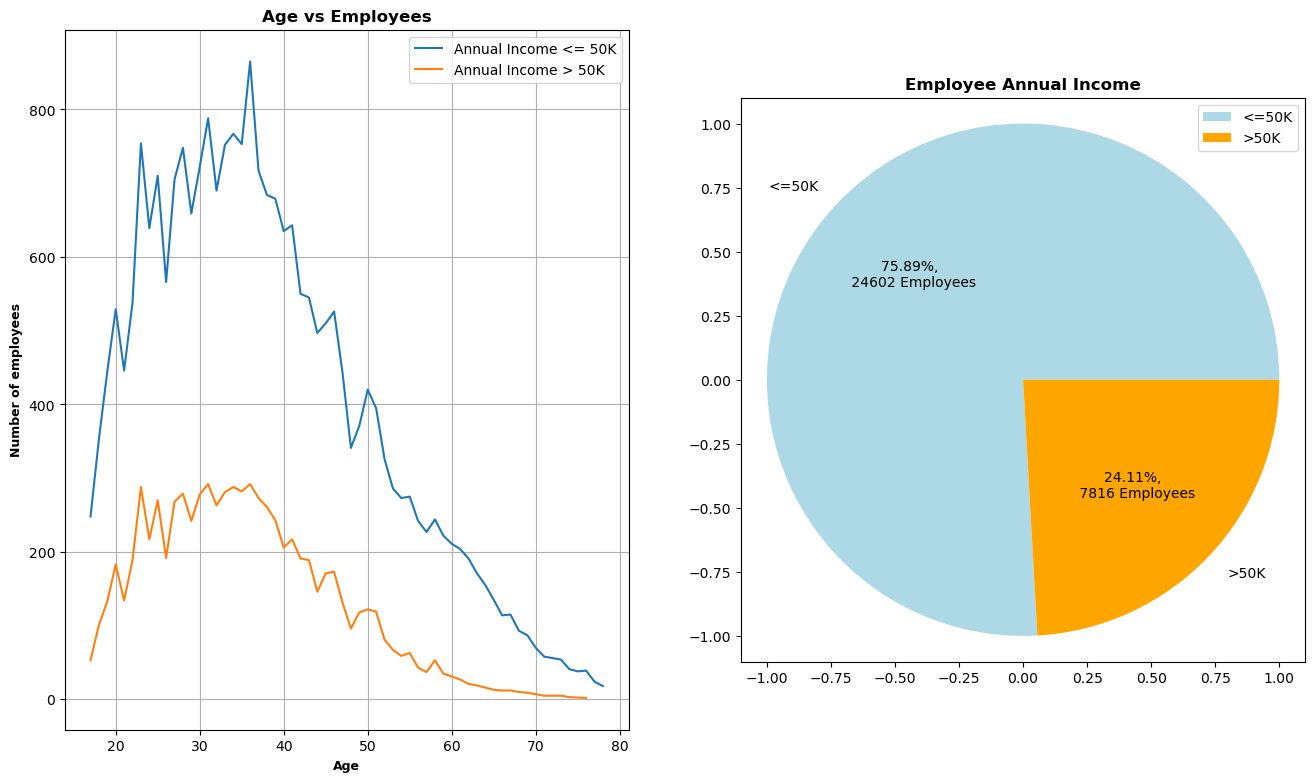

In [41]:
x = pd.Series(df.age.value_counts().index.to_list())
y1 = pd.Series(df.age[df.annual_income == '<=50K'].value_counts().values.tolist())
y2 = pd.Series(df.age[df.annual_income == '>50K'].value_counts().values.tolist())

plt.figure(figsize = (16, 20))

plt.subplot(221)
sns.lineplot(df, x = x, y = y1, label = 'Annual Income <= 50K')
sns.lineplot(df, x = x, y = y2, label = 'Annual Income > 50K')
plt.legend()
plt.xlabel('Age', fontweight = 'bold', fontsize = 9)
plt.ylabel('Number of employees', fontweight = 'bold', fontsize = 9)
plt.title('Age vs Employees', fontweight = 'bold')
plt.grid()

plt.subplot(222)
mylabels = ['<=50K', '>50K']
mycolors = ['lightblue', 'orange']
plt.pie(df.annual_income.value_counts(), colors = mycolors,
        autopct = lambda p:f'{p:.2f}%, \n {p*sum(df.annual_income.value_counts().values)/100 :.0f} Employees',
        frame  = True, labels = mylabels,)
plt.title('Employee Annual Income', fontweight  = 'bold')
plt.legend(loc = 'upper right')
plt.show()

1. **76%** of individuals earn less than **50K**.
2. **Only 24%** of people earn more than **50K**.
3. The majority of earners fall within the **30 to 40 years** age group.
4. As age increases, the number of employees decreases, as indicated by the graph.
5. Interestingly, people begin earning around the age of **10**, but most stop after reaching **76**.

In [42]:
educ = df.education.unique().tolist()

In [43]:
Higher_studies = sorted(['Bachelors','Masters','Some_college','Doctorate'])

In [44]:
len(df['native-country'].groupby(df.education[df.education == 'Assoc_acdm']).value_counts())

31

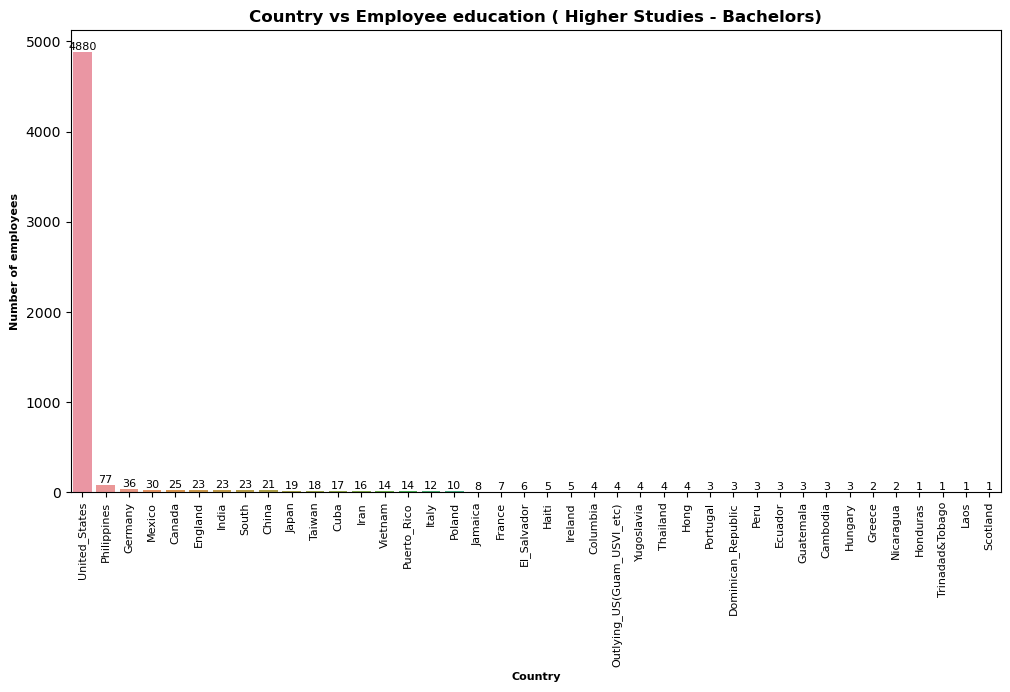

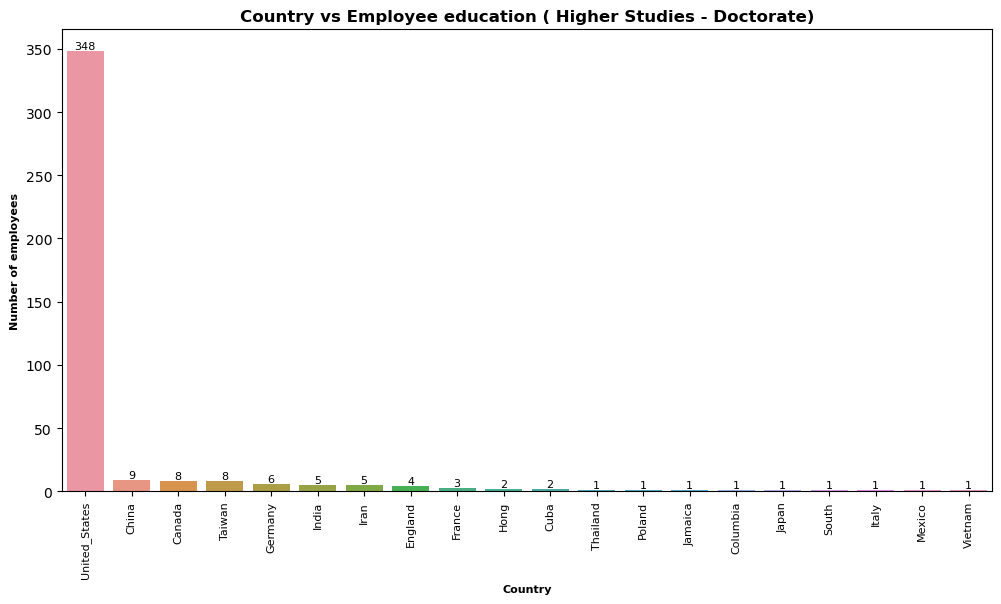

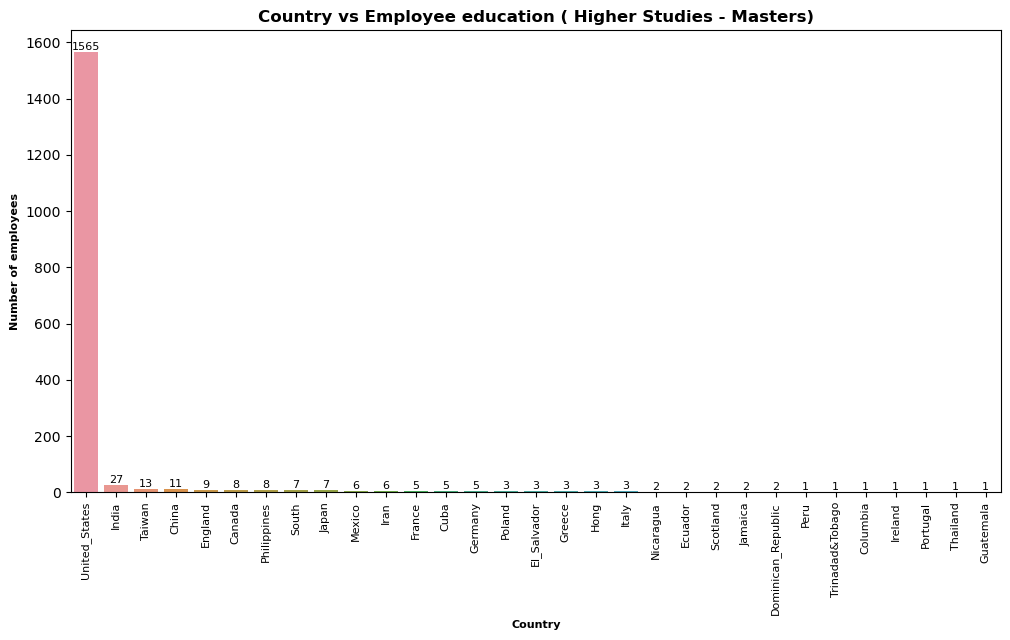

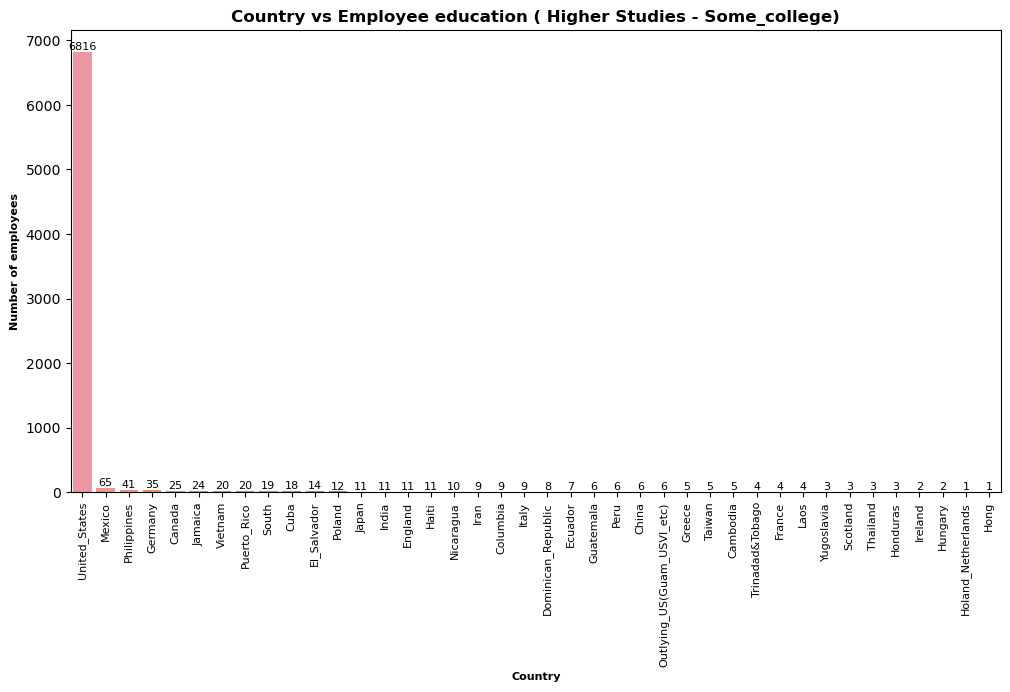

In [45]:
for i in Higher_studies:
    
    plt.figure(figsize = (12, 6))
    ax = sns.countplot(x = df['native-country'][df['education'] == i],
                 order = df['native-country'][df['education'] == i].value_counts().index)
    plt.xlabel('Country', fontsize = 8, fontweight = 'bold')
    plt.xticks(rotation = 90, fontsize = 8)
    plt.ylabel('Number of employees', fontsize = 8, fontweight = 'bold')
    plt.title(f'Country vs Employee education ( Higher Studies - {i})', fontweight  = 'bold')
    ax.bar_label(ax.containers[0], fontsize = 8)
    plt.show()

1. The United States boasts the highest number of employees who have completed their **Bachelor's degree**, followed by the Philippines, Germany, Mexico, Canada, and India. Conversely, the lowest numbers are found in Scotland, Laos, Trinidad and Tobago, Honduras, and Greece.

2. When it comes to **Master's degrees**, the United States again leads the pack, followed by India, Taiwan, China, and England. On the other end, Peru, Trinidad and Tobago, Colombia, Ireland, Portugal, Thailand, and Guatemala have the fewest employees with Master's degrees.

3. For those with a **Doctorate**, the United States maintains its top position, followed by China, Canada, Taiwan, Germany, and India. In contrast, Thailand, Poland, Jamaica, Colombia, Japan, South Korea, Italy, Mexico, and Vietnam have the fewest employees with Doctorates.

4. Considering **college education in general**, the United States remains at the forefront, followed by Mexico, the Philippines, Germany, and Canada. Hong Kong, the Netherlands (Holland), Hungary, Ireland, and Honduras have the lowest numbers of employees with some form of college education.

In [46]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [47]:
workclasses

['Federal_gov',
 'Local_gov',
 'Never_worked',
 'Private',
 'Self_emp_inc',
 'Self_emp_not_inc',
 'State_gov',
 'Without_pay']

In [48]:
self_emp = ['Self_emp_not_inc', 'Self_emp_inc']

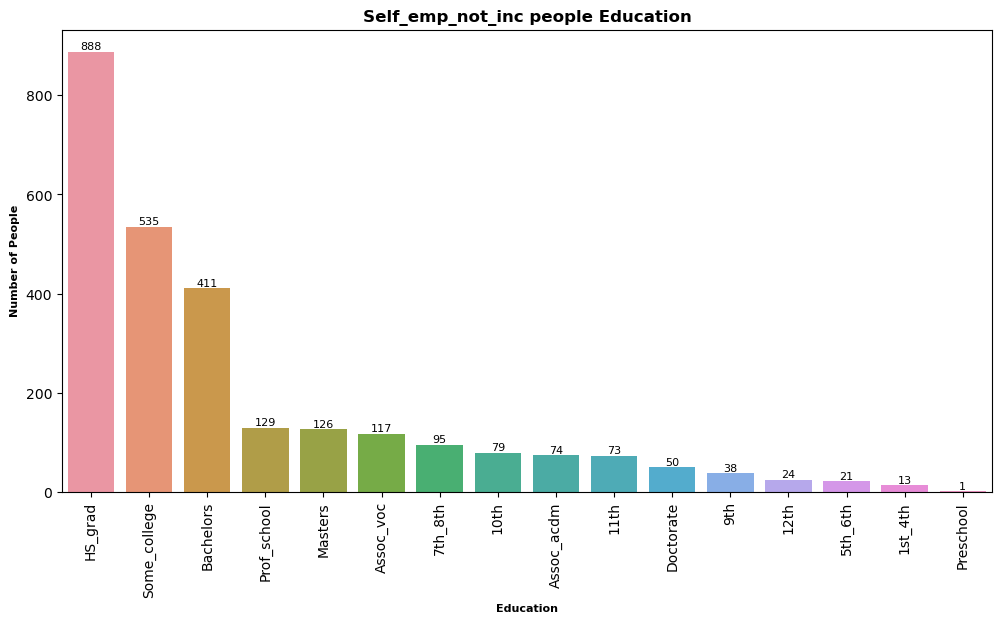

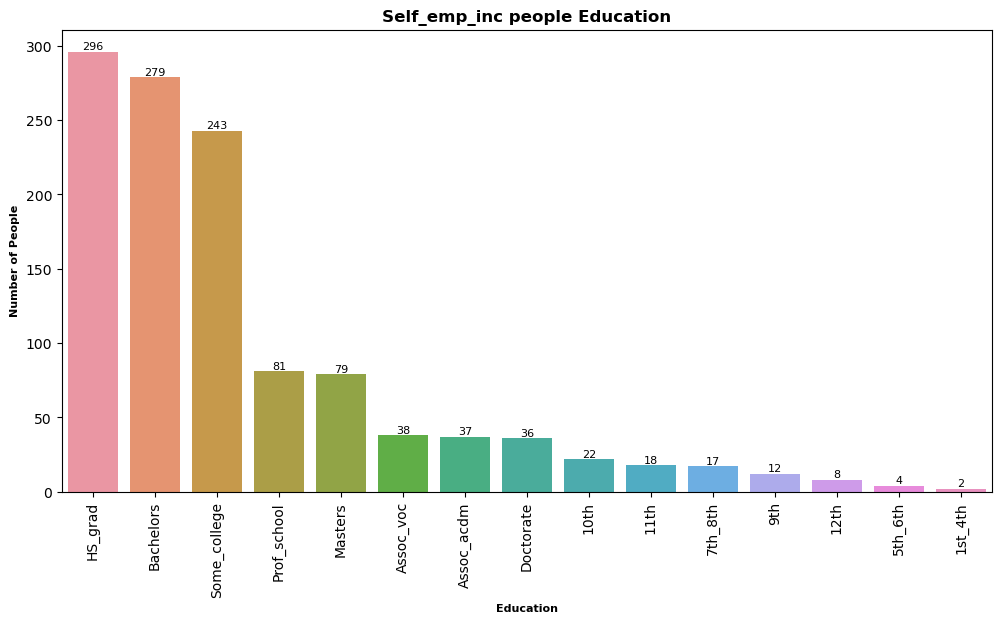

In [49]:
for i in self_emp:
    
    plt.figure(figsize = (12, 6))
    ax = sns.countplot(x = df.education[df.workclass == i],
                 order = df.education[df.workclass == i].value_counts().index)
    plt.xlabel('Education', fontsize = 8, fontweight = 'bold')
    plt.xticks(rotation = 90)
    plt.ylabel('Number of People', fontsize = 8, fontweight = 'bold')
    ax.bar_label(ax.containers[0], fontsize = 8)
    plt.title(f'{i} people Education', fontweight = 'bold')
    plt.show()

#### From the above graph it can observed that **Most self-employed individuals** have a **High School diploma**, followed by those who have completed their **Bachelor's degree** or some form of **college education**.

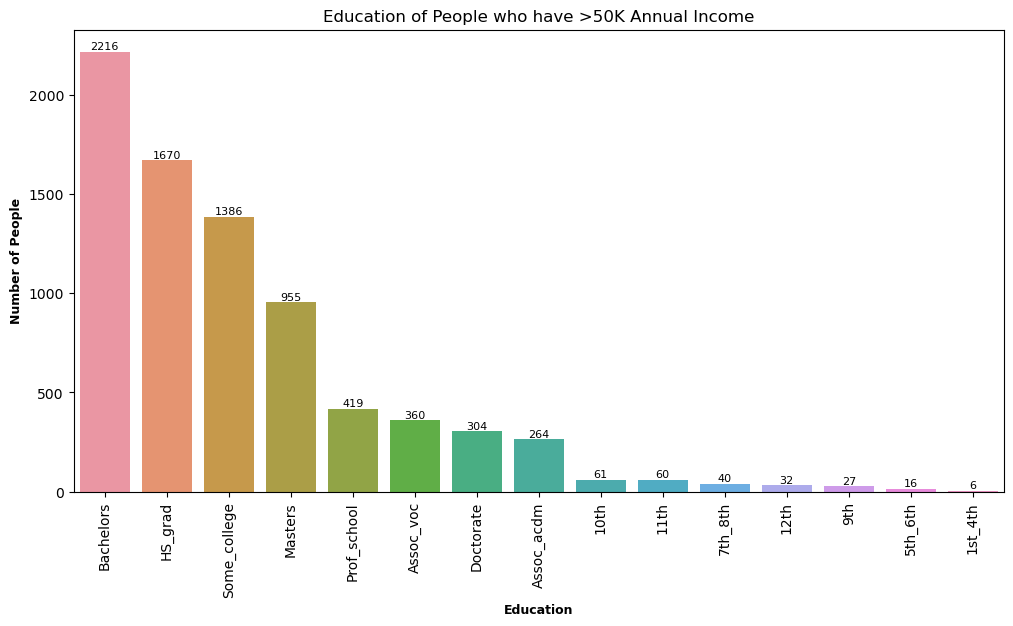

In [50]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = df.education[df.annual_income == '>50K'],
                  order = df.education[df.annual_income == '>50K'].value_counts().index)
plt.xlabel('Education', fontsize = 9, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.ylabel('Number of People',fontsize = 9, fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.title('Education of People who have >50K Annual Income')
plt.show()

#### Individuals earning over **$50,000** annually typically hold a Bachelor's Degree, followed by High School Graduates, Some college education, and Master's qualifications.

In [51]:
races = df.race.unique().tolist()

In [52]:
races

['White', 'Black', 'Asian_Pac_Islander', 'Amer_Indian_Eskimo', 'Other']

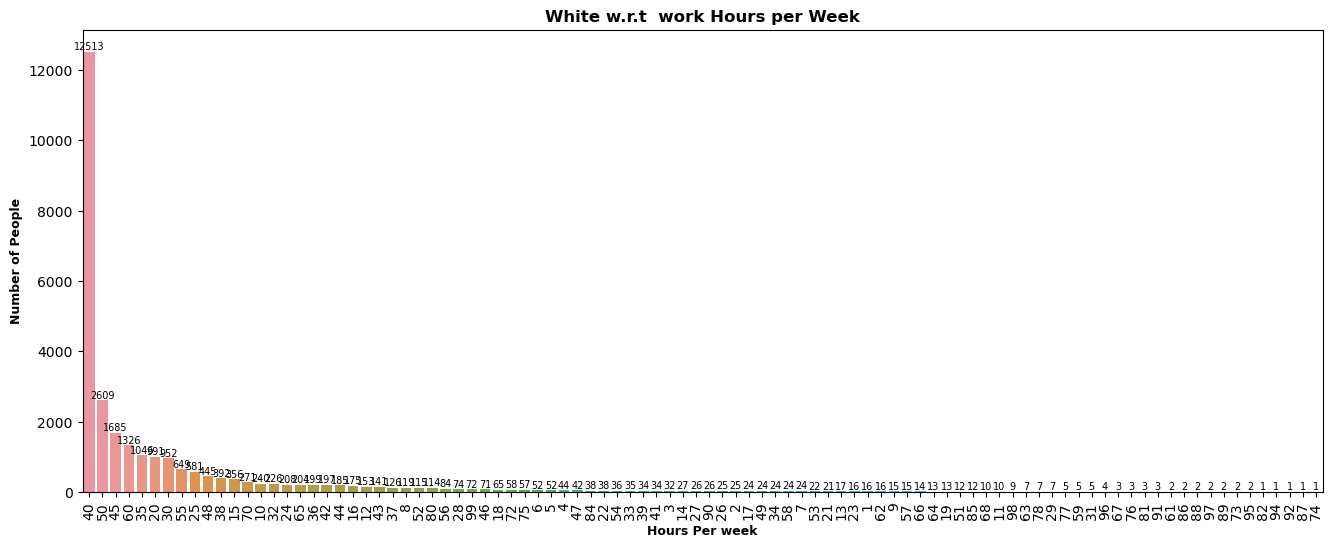

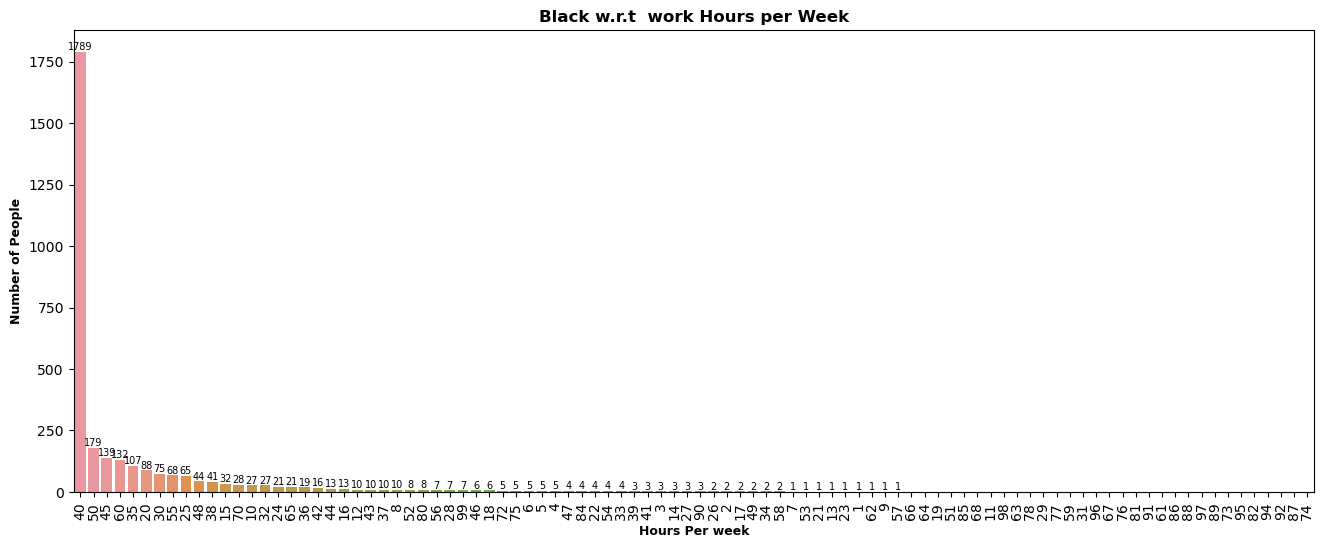

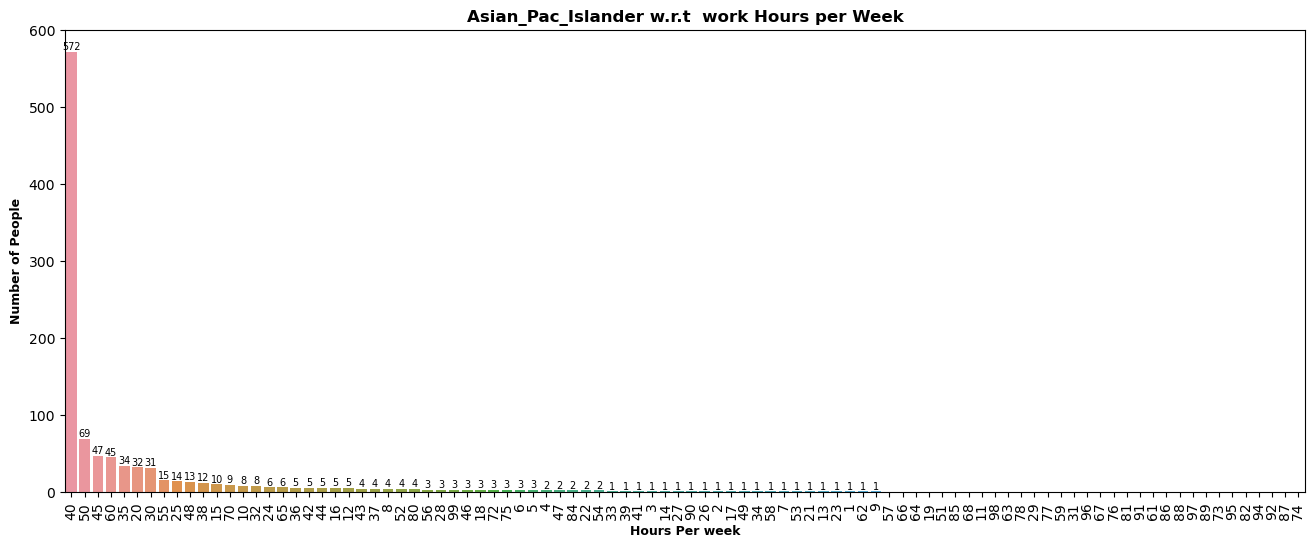

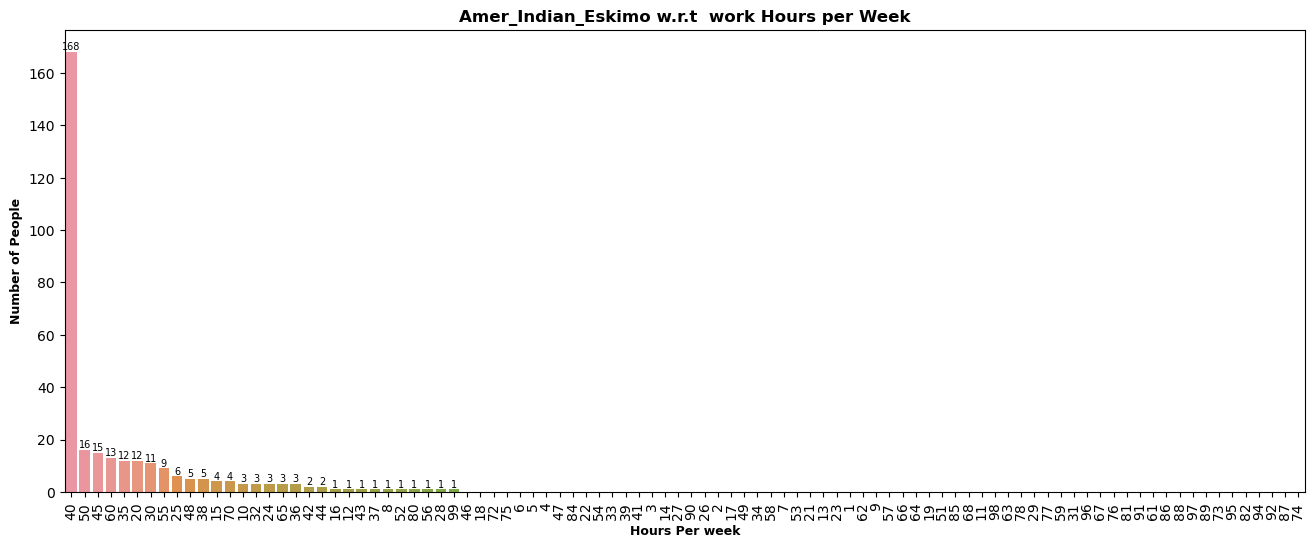

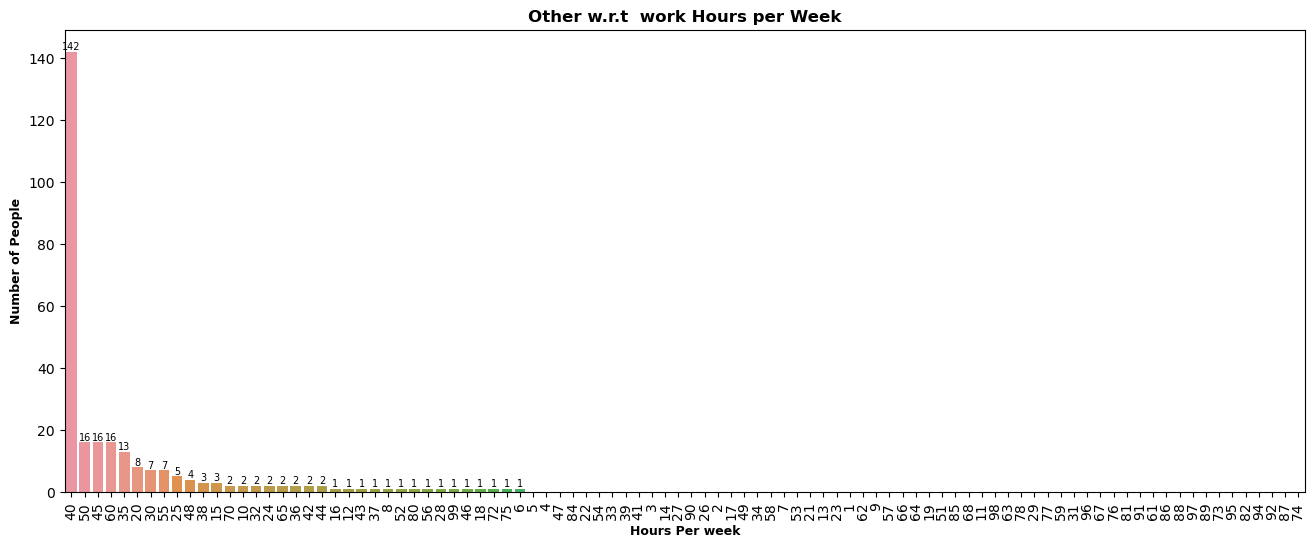

In [53]:
for i in races:
    
    x = pd.Series(df['hours-per-week'].value_counts().index.to_list())
    y = pd.Series(df['hours-per-week'][df.race == i].value_counts().values.tolist())
    
    plt.figure(figsize = (16, 6))
    ax = sns.barplot(x  = x, y = y, order =  df['hours-per-week'].value_counts().index)
    plt.title(f'{i} w.r.t  work Hours per Week', fontweight = 'bold')
    plt.xlabel('Hours Per week', fontsize = 9, fontweight = 'bold')
    plt.xticks(rotation = 90)
    plt.ylabel('Number of People', fontsize = 9, fontweight = 'bold')
    ax.bar_label(ax.containers[0], fontsize = 7)
    plt.show()

1. The majority of people from every race work 40 hours per week.
2. White people have a higher rate of employment than other races.
3. Only a small percentage of White, Black and Asian Pacific Islander people work for a minimum of one hour per week.
4. White people make up the largest proportion of those who work 99 hours per week, although they are very few in number.

In [54]:
occupations = df.occupation.unique()

In [55]:
incomes = df.annual_income.unique().tolist()
incomes

['<=50K', '>50K']

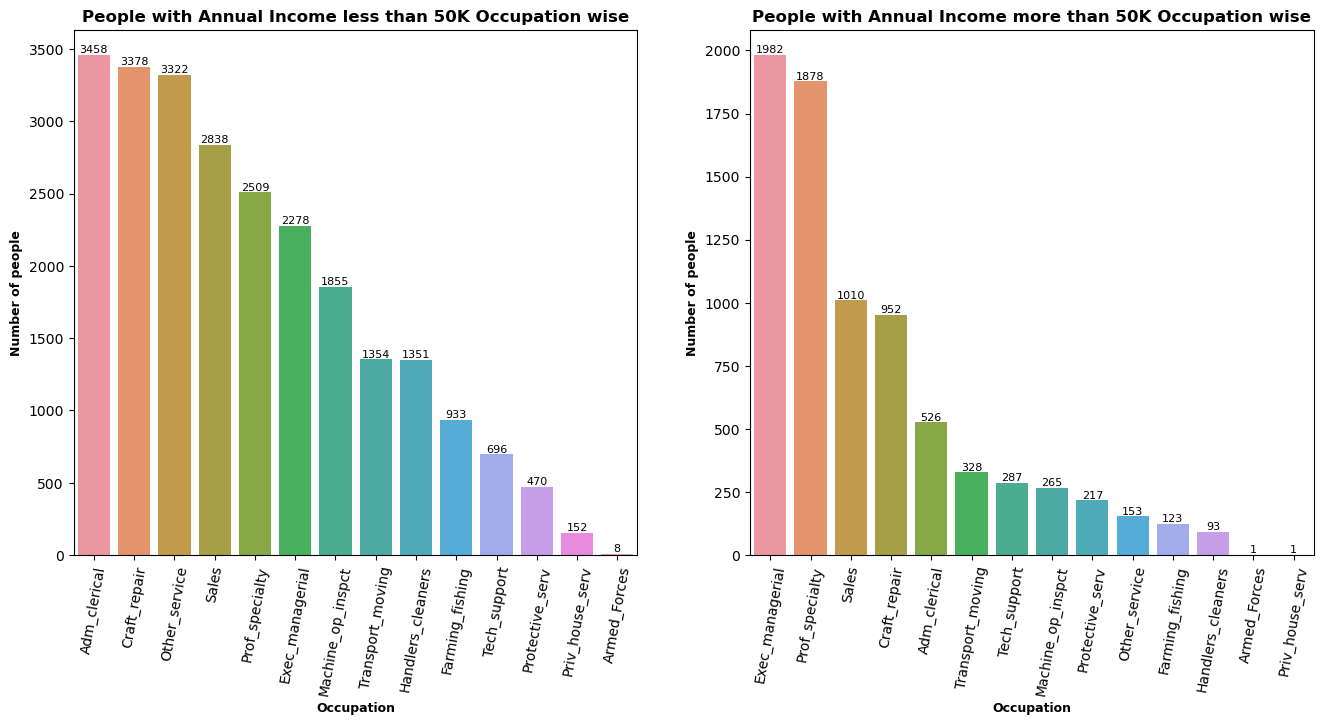

In [56]:
plt.figure(figsize = (16, 15))

plt.subplot(221)
ax = sns.countplot(x = df.occupation[df.annual_income == '<=50K'],
                  order = df.occupation[df.annual_income == '<=50K'].value_counts().index)
plt.title('People with Annual Income less than 50K Occupation wise', fontweight  = 'bold')
plt.xlabel('Occupation', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation = 80)
plt.ylabel('Number of people', fontsize = 9, fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)

plt.subplot(222)
ax = sns.countplot(x = df.occupation[df.annual_income == '>50K'],
                  order = df.occupation[df.annual_income == '>50K'].value_counts().index)
plt.title('People with Annual Income more than 50K Occupation wise', fontweight = 'bold')
plt.xlabel('Occupation', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation = 80)
plt.ylabel('Number of people', fontsize = 9, fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.show()

1. Admin clerical, Craft repair, Other services and Sales are some of the occupations where most people earn below 50K per year. The lowest earners are in Armed Forces, Private House Services, Protective Services, Tech Support and Farming Fishing.
2. Executive Managerial, professional speciality, Sales, Craft Repair and Admin Clerical are some of the occupations where most people earn above 50K per year. The highest earners are in Executive Managerial and professional speciality. The lowest earners are in Private House Service, Armed Forces, Farming Fishing, Other Services and Protective Services.
3. The dataset shows that most people who work in services such as Tech Support, Armed forces, Private security and Protective services earn below 50K per year.
4. The dataset also shows that most people who hold top positions earn above 50K per year.
5. Most people who work in agriculture earn below 50K per year as well.
6. People who have special skills in their profession earn above 50K per year after the managerial level.

In [57]:
sex = df.sex.unique().tolist()

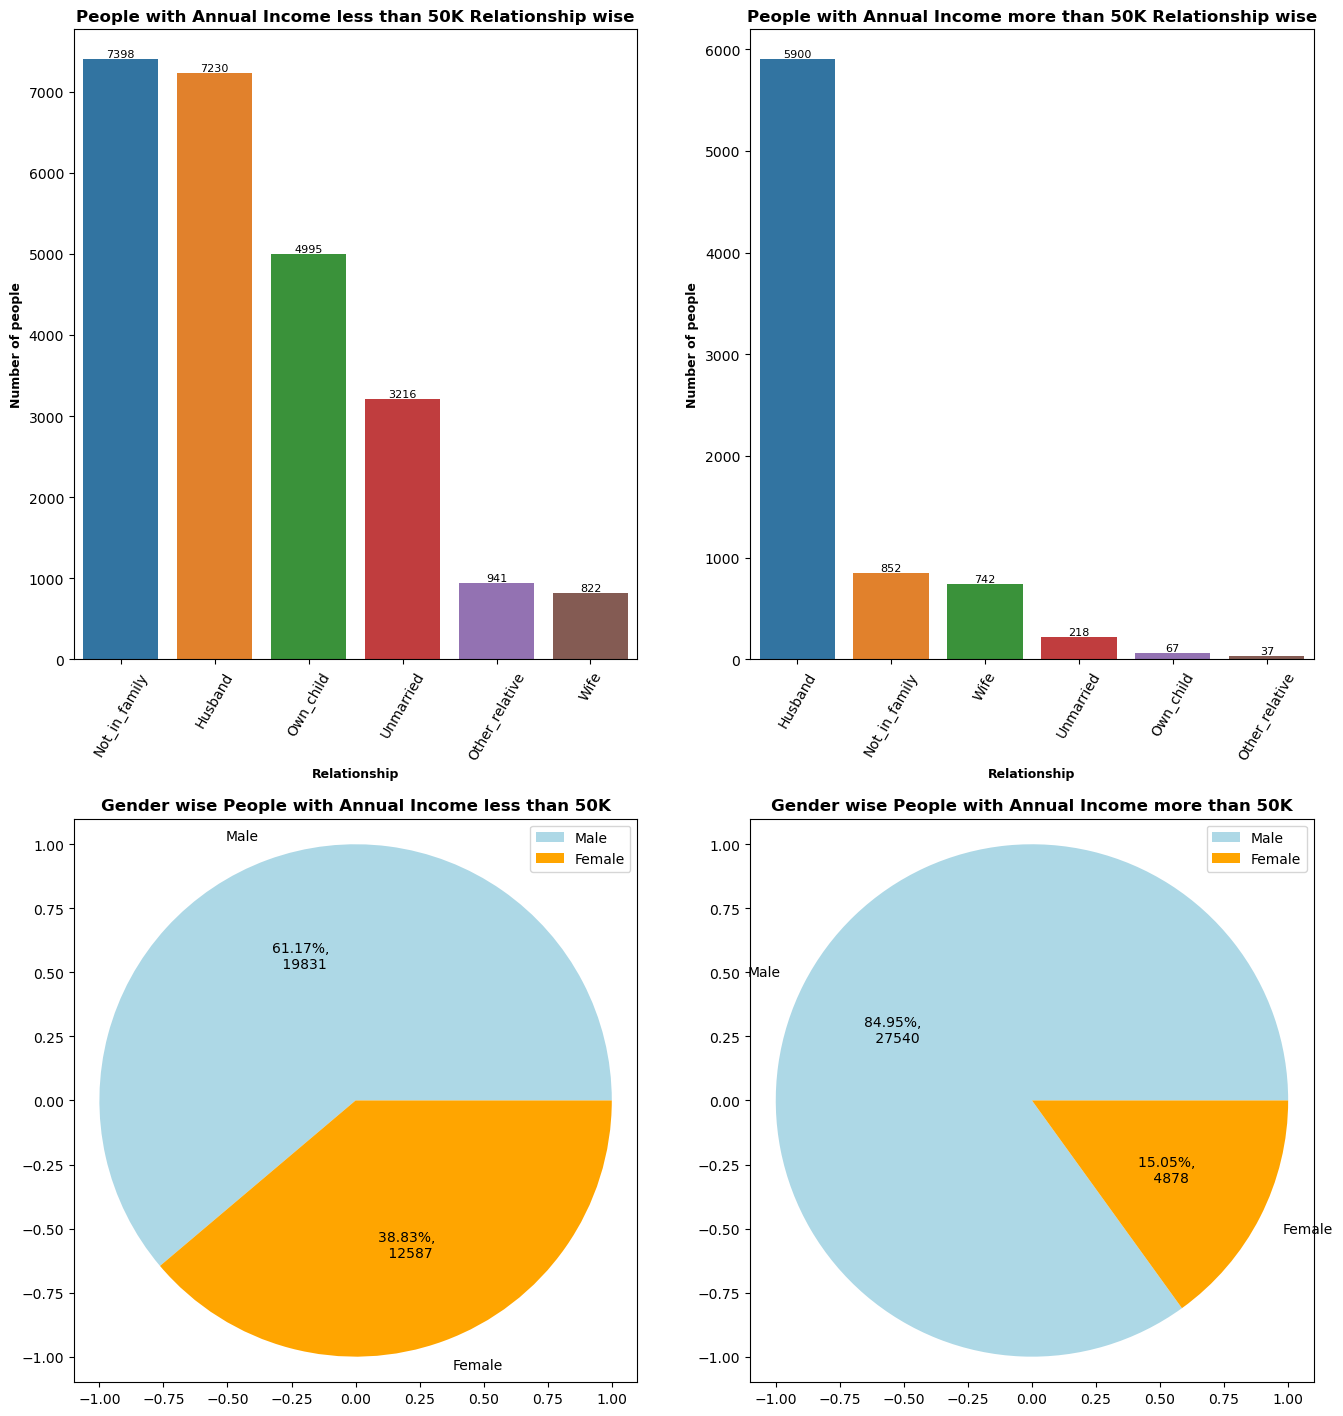

In [58]:
plt.figure(figsize = (16, 18))

plt.subplot(221)
ax = sns.countplot(x = df.relationship[df.annual_income == '<=50K'],
                  order = df.relationship[df.annual_income == '<=50K'].value_counts().index)
plt.title('People with Annual Income less than 50K Relationship wise', fontweight  = 'bold')
plt.xlabel('Relationship', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation = 60)
plt.ylabel('Number of people', fontsize = 9, fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)

plt.subplot(222)
ax = sns.countplot(x = df.relationship[df.annual_income == '>50K'],
                  order = df.relationship[df.annual_income == '>50K'].value_counts().index)
plt.title('People with Annual Income more than 50K Relationship wise', fontweight = 'bold')
plt.xlabel('Relationship', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation = 60)
plt.ylabel('Number of people', fontsize = 9, fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)

plt.subplot(223)
mycolors = ['lightblue', 'orange']
plt.pie(df.sex[df.annual_income == '<=50K'].value_counts(), labels = sex, colors = mycolors, frame = True,
       autopct = lambda p:f'{p:.2f}%, \n {p*sum(df.sex.value_counts().values)/100 :.0f}')
plt.title('Gender wise People with Annual Income less than 50K',fontweight = 'bold')
plt.legend()


plt.subplot(224)
mycolors = ['lightblue', 'orange']
plt.pie(df.sex[df.annual_income == '>50K'].value_counts(), labels = sex, colors = mycolors, frame = True,
       autopct = lambda p:f'{p:.2f}%, \n {p*sum(df.sex.value_counts().values)/100 :.0f}')
plt.title('Gender wise People with Annual Income more than 50K',fontweight = 'bold')
plt.legend()

plt.show()

1. People who are not in a family relationship have the lowest annual income below 50K, followed by husbands, parents, singles, relatives, and wives.
2. Husbands have the highest annual income above 50K, followed by people who are not in a family relationship, wives, singles, parents, and relatives.
3. The bar graphs show that husbands have a higher income than wives in a married relationship.
4. People who have no family have a lower annual income below 50K than people who have some kind of relationship.
5. Married people have a higher annual income above 50K than unmarried people.
6. Most parents have an annual income below 50K.
7. The pie chart shows that there are more males than females earning an income.
8. Among the people who earn less than 50K annually, 61% are males and 39% are females.
9. Among the people who earn more than 50K annually, 85% are males and 15% are females.

In [59]:
relationships = df.relationship.unique().tolist()
relationships

['Not_in_family',
 'Husband',
 'Wife',
 'Own_child',
 'Unmarried',
 'Other_relative']

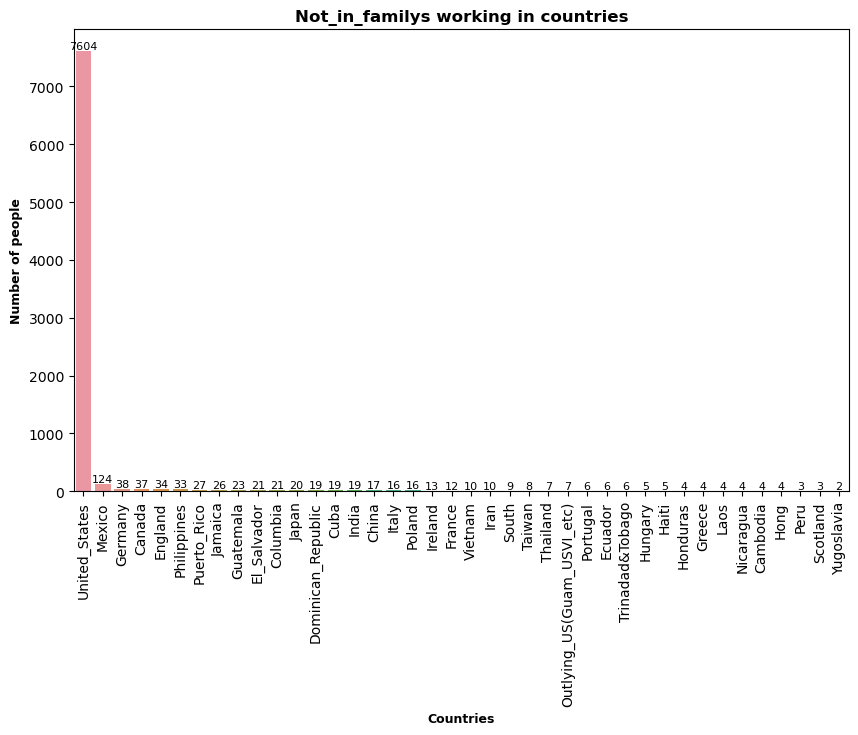

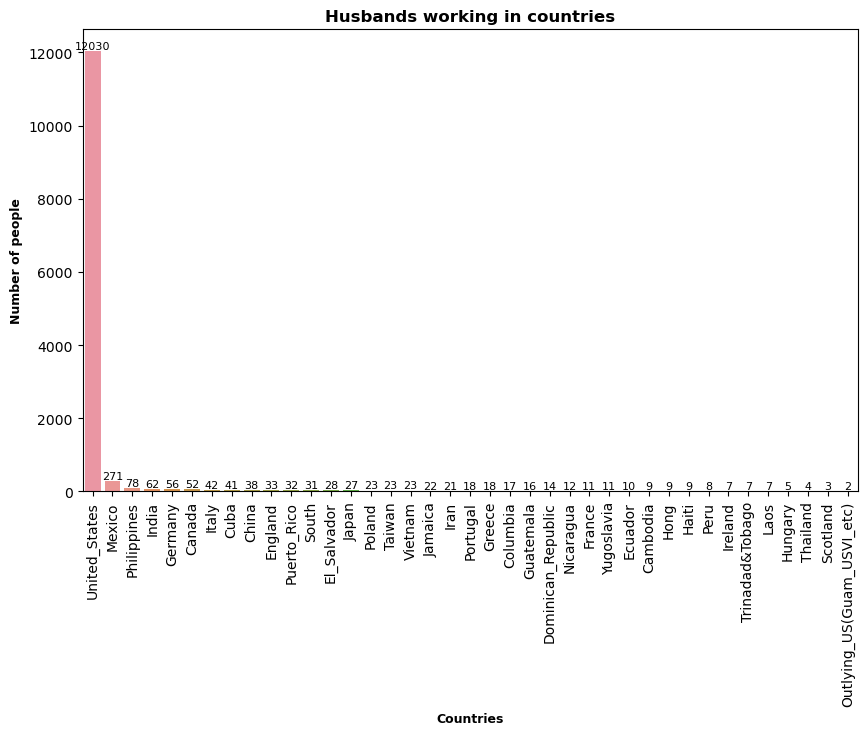

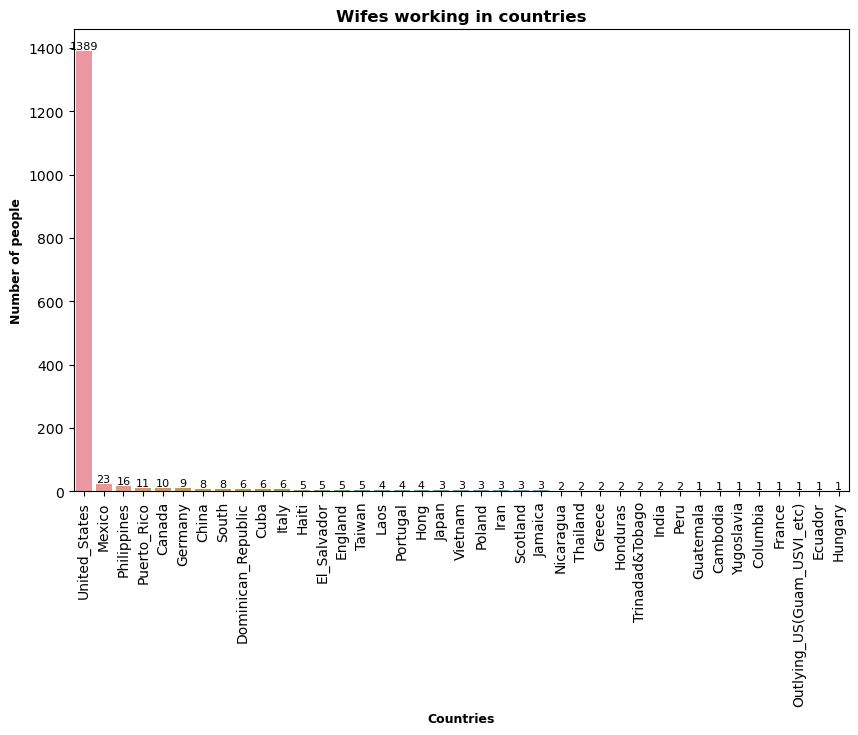

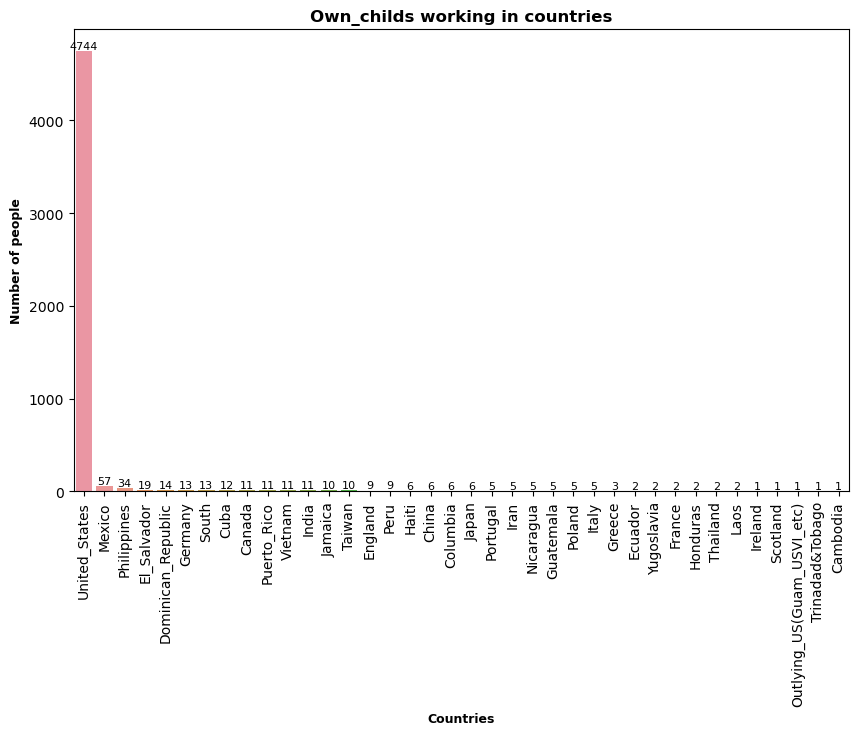

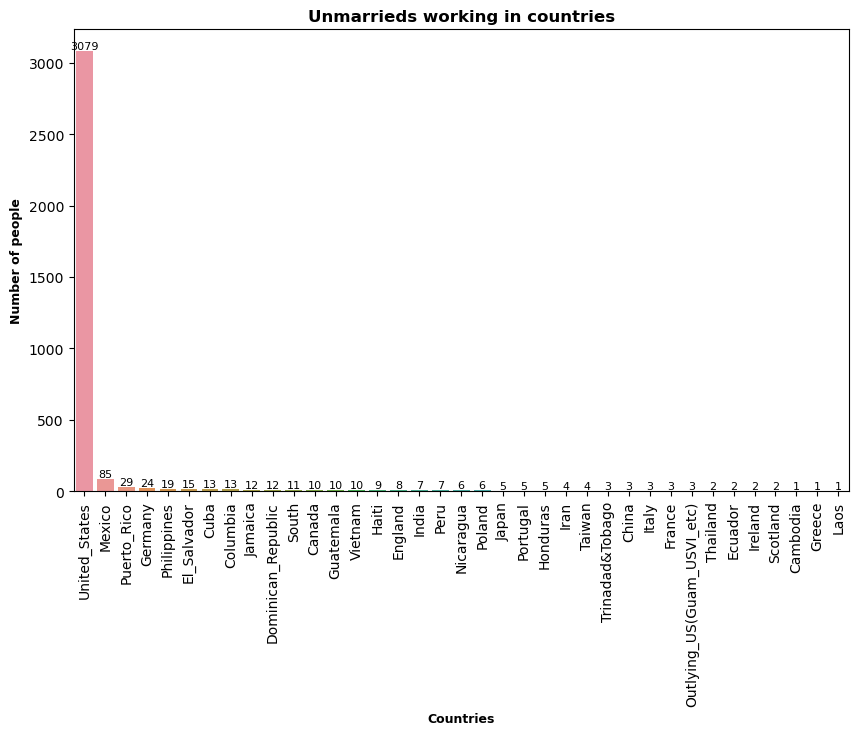

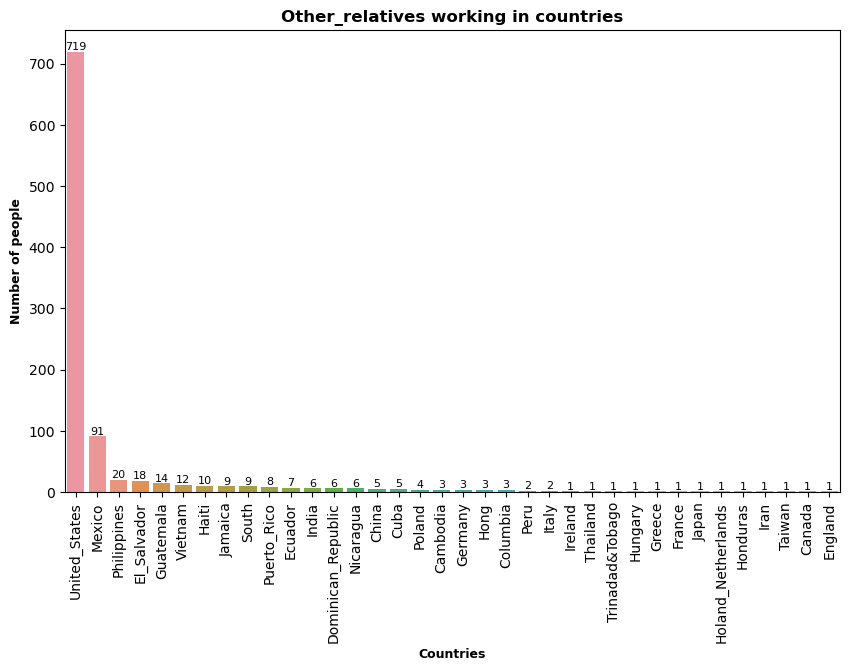

In [60]:
for i in relationships:
    
    plt.figure(figsize = (10, 6))
    ax = sns.countplot(x = df['native-country'][df.relationship == i],
                      order = df['native-country'][df.relationship == i].value_counts().index)
    plt.title(f'{i}s working in countries', fontweight = 'bold')
    plt.xlabel('Countries', fontsize = 9, fontweight = 'bold')
    plt.xticks(rotation = 90)
    plt.ylabel('Number of people', fontsize = 9, fontweight = 'bold')
    ax.bar_label(ax.containers[0], fontsize = 8)
    plt.show()

1. The United States has the highest number of workers who are not in a family relationship, followed by Mexico, Germany, Canada and England. The lowest number of such workers are in Yugoslavia, Scotland, Peru, Hong Kong, Cambodia and Nicaragua.
2. Among married couples, most husbands work in the United States, Mexico, the Phillippines, India and Germany. The fewest husbands work in Outlying US, Scotland, Thailand, Hungary and Laos.
3. Among married couples, most wives work in the United States, Mexico, the Phillipines, Puerto Rico, Canada and Germany. The fewest wives work in Hungary, Ecuador, Outlying US, France and Columbia.
4. The United States has the highest number of workers who have children, followed by Mexico, the Phillippines, El Salvador, Dominican Republic and Germany. The lowest number of such workers are in Cambodia, Trinidad and Tobago, Outlying US, Scotland and Ireland.
5. The United States has the highest number of workers who are unmarried, followed by Mexico, Puerto Rico, Germany and the Phillippines. The lowest number of such workers are in Laos, Greece, Cambodia, Scotland and Ireland.
6. The United States has the highest number of workers who have other relationships, followed by Mexico, the Phillippines, El Salvador and Guatemala. The lowest number of such workers are in England, Canada, Taiwan, Iran, Honduras, Holand Netherelands, Japan, France and Greece.
7. Based on the above graphs, Mexico has the second highest number of workers across all categories.
8. None of the workers who have other relationships work in Outlying US.

### One hot Encoding

In [61]:
df2 = df

In [62]:
df2.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State_gov   77516  Bachelors             13   
1   50  Self_emp_not_inc   83311  Bachelors             13   
2   38           Private  215646    HS_grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never_married       Adm_clerical  Not_in_family  White    Male   
1  Married_civ_spouse    Exec_managerial        Husband  White    Male   
2            Divorced  Handlers_cleaners  Not_in_family  White    Male   
3  Married_civ_spouse  Handlers_cleaners        Husband  Black    Male   
4  Married_civ_spouse     Prof_specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country annual_income  
0          2174             0              40  United_States         <=50K  
1             0             0              13  United_States         <=50K  
2             0             0              40  United_States         <=50K  
3             0             0              40  United_States         <=50K  
4             0             0              40           Cuba         <=50K

In [63]:
def object_columns(dataset):
    for i in dataset.columns:

        if dataset[i].dtype == 'object':

            print(i)
            print(dataset[i].unique().tolist(), '\n')

In [64]:
object_columns(df2)

workclass
['State_gov', 'Self_emp_not_inc', 'Private', 'Federal_gov', 'Local_gov', 'Self_emp_inc', 'Without_pay', 'Never_worked'] 

education
['Bachelors', 'HS_grad', '11th', 'Masters', '9th', 'Some_college', 'Assoc_acdm', 'Assoc_voc', '7th_8th', 'Doctorate', 'Prof_school', '5th_6th', '10th', '1st_4th', 'Preschool', '12th'] 

marital-status
['Never_married', 'Married_civ_spouse', 'Divorced', 'Married_spouse_absent', 'Separated', 'Married_AF_spouse', 'Widowed'] 

occupation
['Adm_clerical', 'Exec_managerial', 'Handlers_cleaners', 'Prof_specialty', 'Other_service', 'Sales', 'Craft_repair', 'Transport_moving', 'Farming_fishing', 'Machine_op_inspct', 'Tech_support', 'Protective_serv', 'Armed_Forces', 'Priv_house_serv'] 

relationship
['Not_in_family', 'Husband', 'Wife', 'Own_child', 'Unmarried', 'Other_relative'] 

race
['White', 'Black', 'Asian_Pac_Islander', 'Amer_Indian_Eskimo', 'Other'] 

sex
['Male', 'Female'] 

native-country
['United_States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'S

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
def OneHotEncoding(dataset):
    
    for i in dataset.columns:
        
        if dataset[i].dtype == 'object':
            
            dataset[i] = le.fit_transform(dataset[i])

In [67]:
OneHotEncoding(df2)

In [68]:
df2.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country  annual_income  
0              40              38              0  
1              13              38              0  
2              40              38              0  
3              40              38              0  
4              40               4              0

### Feature Selection

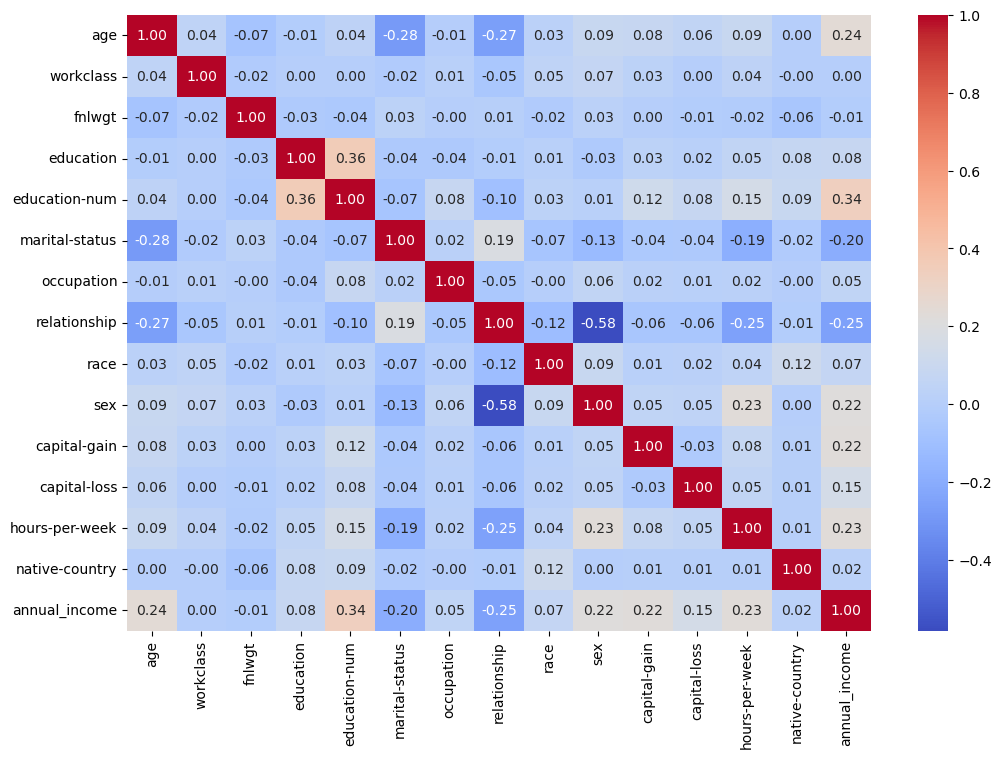

In [69]:
plt.figure(figsize = (12, 8))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for i in df2.columns:
    
    if i!= 'annual_income':
        col_list.append(i)

In [71]:
x = df2[col_list]

vif_data = pd.DataFrame()
vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

features        VIF
0              age   9.173774
1        workclass   8.068466
2           fnlwgt   4.043559
3        education   9.227314
4    education-num  18.780472
5   marital-status   4.085120
6       occupation   3.208000
7     relationship   2.673054
8             race  17.883559
9              sex   4.496046
10    capital-gain   1.044705
11    capital-loss   1.061993
12  hours-per-week  12.134592
13  native-country  28.336940

**Columns which have more than 5 VIF score will be deleted**

In [72]:
pop_columns = vif_data.features[vif_data.VIF >= 5].to_list()

In [73]:
df2.drop(columns = pop_columns, inplace = True)
df2.head()

fnlwgt  marital-status  occupation  relationship  sex  capital-gain  \
0   77516               4           0             1    1          2174   
1   83311               2           3             0    1             0   
2  215646               0           5             1    1             0   
3  234721               2           5             0    1             0   
4  338409               2           9             5    0             0   

   capital-loss  annual_income  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

### Model Building

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [75]:
x = df2.drop(columns = ['annual_income'], axis = 1)
y = df2.annual_income

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle = True)

In [77]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Logistic Regression

In [78]:
log_res = LogisticRegression()

log_res.fit(x_train, y_train)

LogisticRegression()

In [79]:
log_predict = log_res.predict(x_test)

In [80]:
print(f'Logistic Regression Accuracy score is: {round(accuracy_score(y_test, log_predict)* 100 , 2)}')

Logistic Regression Accuracy score is: 80.42


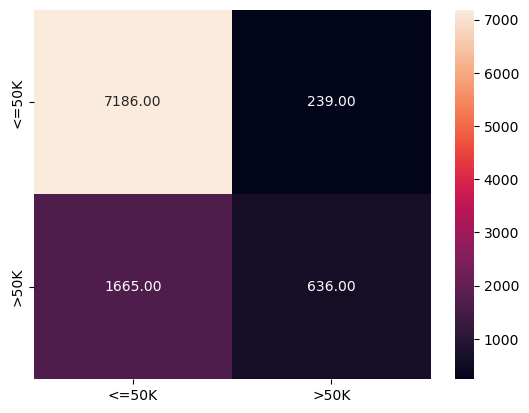

In [82]:
cm = confusion_matrix(y_test, log_predict)

sns.heatmap(cm, annot = True, xticklabels = incomes, yticklabels = incomes, fmt = '.2f')

plt.show()

In [83]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7425
           1       0.73      0.28      0.40      2301

    accuracy                           0.80      9726
   macro avg       0.77      0.62      0.64      9726
weighted avg       0.79      0.80      0.77      9726



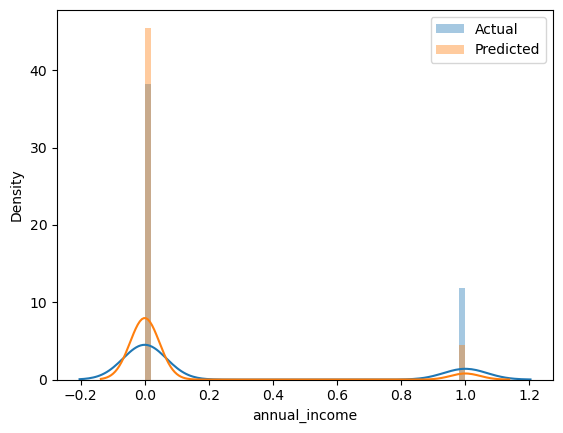

In [84]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(log_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Decision Tree Classifier

In [85]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
dtc_predict = dtc.predict(x_test)

In [87]:
print(f'Decision Tree Classifier Accuracy score is: {round(accuracy_score(y_test, dtc_predict)* 100, 2)}')

Decision Tree Classifier Accuracy score is: 78.58


##### Hyperparameter tuning

In [88]:
parameters = {'max_features':['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth':[2,3,5,10,50],
              'min_samples_split':[2,3,50,100],
              'min_samples_leaf':[1,5,8,10]}

In [89]:
grid_obj = GridSearchCV(dtc, parameters)

grid_obj = grid_obj.fit(x_train, y_train)

dtc = grid_obj.best_estimator_

dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=50)

In [90]:
dtc_predict = dtc.predict(x_test)

In [91]:
print(f'Decision Tree Classifier accuracy score is: {round(accuracy_score(y_test, dtc_predict))}')

Decision Tree Classifier accuracy score is: 1


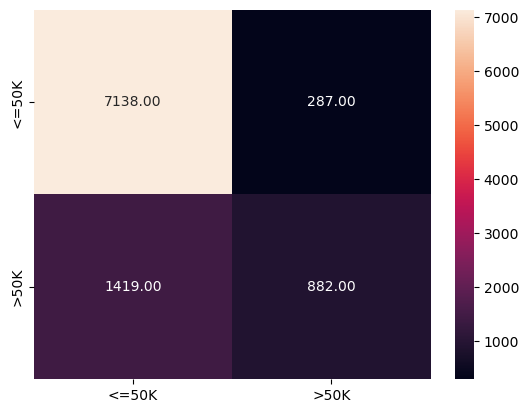

In [92]:
cm =  confusion_matrix(y_test, dtc_predict)

sns.heatmap(cm, annot=True, xticklabels=incomes, yticklabels=incomes, fmt='.2f')

plt.show()

In [93]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7425
           1       0.75      0.38      0.51      2301

    accuracy                           0.82      9726
   macro avg       0.79      0.67      0.70      9726
weighted avg       0.82      0.82      0.80      9726



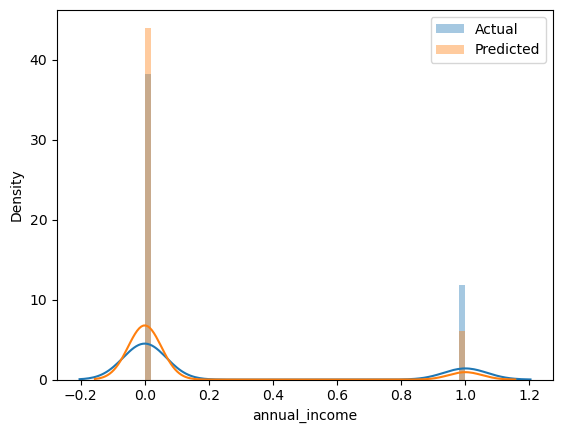

In [94]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(dtc_predict, label = 'Predicted')
plt.legend()
plt.show()

#### Random Forest Classifier

In [95]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [96]:
rfc_predict = rfc.predict(x_test)

In [98]:
print(f'Random Forest Classifier accuracy score is: {round(accuracy_score(y_test, rfc_predict)* 100, 2)}')

Random Forest Classifier accuracy score is: 80.03


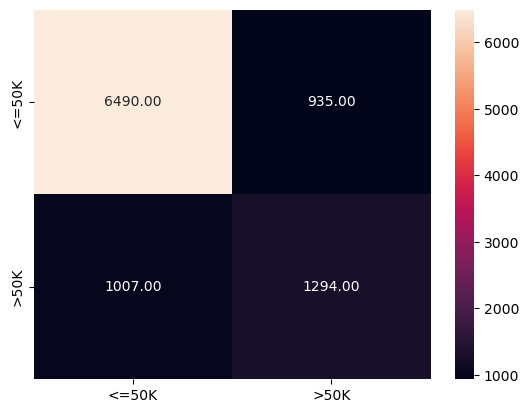

In [100]:
cm = confusion_matrix(y_test, rfc_predict)

sns.heatmap(cm, annot=True, xticklabels=incomes, yticklabels=incomes, fmt='.2f')

plt.show()

In [101]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7425
           1       0.58      0.56      0.57      2301

    accuracy                           0.80      9726
   macro avg       0.72      0.72      0.72      9726
weighted avg       0.80      0.80      0.80      9726



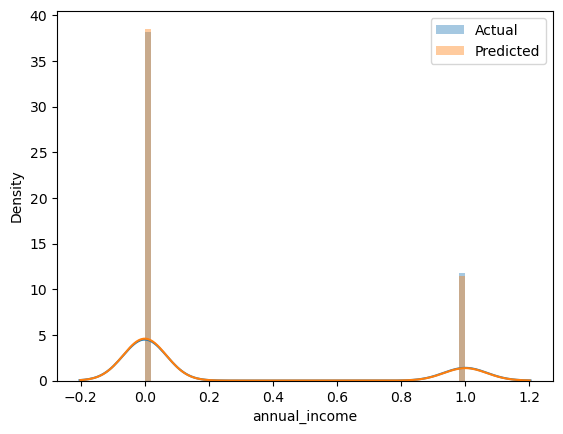

In [102]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(rfc_predict, label = 'Predicted')
plt.legend()
plt.show()

**Random Forest Classifier is giving the best predictions**